In [ ]:
# 패키지 설치
!pip install transformers torch scipy pandas tqdm -q

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
from tqdm import tqdm
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
tqdm.pandas()

print("✓ 라이브러리 임포트 완료!")
print(f"✓ PyTorch version: {torch.__version__}")
print(f"✓ CUDA available: {torch.cuda.is_available()}")

✓ 라이브러리 임포트 완료!
✓ PyTorch version: 2.8.0+cu126
✓ CUDA available: False


### Step 2: Multilingual Sentiment Model

In [ ]:
MODEL_NAME = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

print("📥 Multilingual sentiment model 로딩 중...")
print(f"Model: {MODEL_NAME}")

# GPU 체크
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✓ 사용 디바이스: {device}")

# 모델 & 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device)
model.eval()

print("✓ 모델 로드 완료!")

# 라벨 매핑
labels = ['negative', 'neutral', 'positive']

📥 Multilingual sentiment model 로딩 중...
Model: cardiffnlp/twitter-xlm-roberta-base-sentiment
✓ 사용 디바이스: cpu


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

✓ 모델 로드 완료!


In [ ]:
def analyze_sentiment(text, max_length=512):
    """
    텍스트 하나의 sentiment 분석
    Returns: dict with scores and predicted label
    """
    if pd.isna(text) or text == "":
        return {'negative': 0, 'neutral': 1, 'positive': 0, 'label': 'neutral'}

    # 텍스트가 너무 길면 truncate
    encoded = tokenizer(str(text), return_tensors='pt', truncation=True,
                       max_length=max_length, padding=True)
    encoded = {k: v.to(device) for k, v in encoded.items()}

    with torch.no_grad():
        output = model(**encoded)

    scores = output.logits[0].cpu().numpy()
    scores = softmax(scores)

    result = {
        'negative': float(scores[0]),
        'neutral': float(scores[1]),
        'positive': float(scores[2]),
        'label': labels[np.argmax(scores)]
    }

    return result

print("✓ Sentiment 분석 함수 정의 완료!")

✓ Sentiment 분석 함수 정의 완료!


In [ ]:
# 테스트 샘플
test_samples = {
    'English Positive': "Renewable energy investments reach record highs, driving sustainable growth and creating thousands of green jobs.",
    'English Negative': "Corporate scandal reveals systematic environmental violations and cover-ups, raising serious concerns.",
    'English Neutral': "The company released its annual sustainability report yesterday.",
    'Korean Positive': "재생에너지 투자가 사상 최고치를 기록하며 지속가능한 성장을 이끌고 수천 개의 녹색 일자리를 창출하고 있다.",
    'Korean Negative': "기업 스캔들로 조직적인 환경 위반과 은폐가 드러나 심각한 우려를 낳고 있다.",
    'Korean Neutral': "회사가 어제 연례 지속가능성 보고서를 발표했다."
}

print("🧪 모델 테스트 중...\n")
print("=" * 80)

for name, text in test_samples.items():
    result = analyze_sentiment(text)
    print(f"\n{name}:")
    print(f"  Text: {text[:80]}..." if len(text) > 80 else f"  Text: {text}")
    print(f"  ➜ Predicted: {result['label'].upper()}")
    print(f"  ➜ Scores - Neg: {result['negative']:.3f} | Neu: {result['neutral']:.3f} | Pos: {result['positive']:.3f}")
    print("-" * 80)

print("\n✓ 모델 테스트 완료!")

🧪 모델 테스트 중...


English Positive:
  Text: Renewable energy investments reach record highs, driving sustainable growth and ...
  ➜ Predicted: POSITIVE
  ➜ Scores - Neg: 0.018 | Neu: 0.105 | Pos: 0.877
--------------------------------------------------------------------------------

English Negative:
  Text: Corporate scandal reveals systematic environmental violations and cover-ups, rai...
  ➜ Predicted: NEGATIVE
  ➜ Scores - Neg: 0.852 | Neu: 0.127 | Pos: 0.021
--------------------------------------------------------------------------------

English Neutral:
  Text: The company released its annual sustainability report yesterday.
  ➜ Predicted: NEUTRAL
  ➜ Scores - Neg: 0.033 | Neu: 0.718 | Pos: 0.249
--------------------------------------------------------------------------------

Korean Positive:
  Text: 재생에너지 투자가 사상 최고치를 기록하며 지속가능한 성장을 이끌고 수천 개의 녹색 일자리를 창출하고 있다.
  ➜ Predicted: POSITIVE
  ➜ Scores - Neg: 0.032 | Neu: 0.163 | Pos: 0.805
------------------------------------------------

In [ ]:
from google.colab import files

print("=" * 80)
print("📤 6개 파일 업로드")
print("=" * 80)
print("\n업로드할 파일:")
print("  🇰🇷 한국: E+topic, S+topic, G+topic")
print("  🇬🇧 영국: E+topic, S+topic, G+topic")
print("\n업로드 시작...")

uploaded_files = files.upload()

print(f"\n✓ {len(uploaded_files)}개 파일 업로드 완료!")
print("\n업로드된 파일:")
for filename in uploaded_files.keys():
    print(f"  - {filename}")

📤 6개 파일 업로드

업로드할 파일:
  🇰🇷 한국: E+topic, S+topic, G+topic
  🇬🇧 영국: E+topic, S+topic, G+topic

업로드 시작...


Saving korea_e_with_topics.csv to korea_e_with_topics.csv
Saving korea_g_with_topics.csv to korea_g_with_topics.csv
Saving korea_s_with_topics.csv to korea_s_with_topics.csv
Saving uk_e_with_topics.csv to uk_e_with_topics.csv
Saving uk_g_with_topics.csv to uk_g_with_topics.csv
Saving uk_s_with_topics.csv to uk_s_with_topics.csv

✓ 6개 파일 업로드 완료!

업로드된 파일:
  - korea_e_with_topics.csv
  - korea_g_with_topics.csv
  - korea_s_with_topics.csv
  - uk_e_with_topics.csv
  - uk_g_with_topics.csv
  - uk_s_with_topics.csv


In [ ]:
#파일 분류 (한국 vs 영국, E/S/G)
korean_files = {}
uk_files = {}

for filename in uploaded_files.keys():
    # 파일명에서 국가와 ESG 타입 추출
    # 예: 'korean_E_with_topic.csv' 또는 'uk_environment_topic.xlsx'

    if 'korea' in filename.lower() or 'kr' in filename.lower():
        if 'e' in filename.lower() and 'environment' in filename.lower():
            korean_files['E'] = filename
        elif 's' in filename.lower() and 'social' in filename.lower():
            korean_files['S'] = filename
        elif 'g' in filename.lower() and 'governance' in filename.lower():
            korean_files['G'] = filename
        elif '_e_' in filename.lower() or '_e.' in filename.lower():
            korean_files['E'] = filename
        elif '_s_' in filename.lower() or '_s.' in filename.lower():
            korean_files['S'] = filename
        elif '_g_' in filename.lower() or '_g.' in filename.lower():
            korean_files['G'] = filename

    elif 'uk' in filename.lower() or 'britain' in filename.lower() or 'england' in filename.lower():
        if 'e' in filename.lower() and 'environment' in filename.lower():
            uk_files['E'] = filename
        elif 's' in filename.lower() and 'social' in filename.lower():
            uk_files['S'] = filename
        elif 'g' in filename.lower() and 'governance' in filename.lower():
            uk_files['G'] = filename
        elif '_e_' in filename.lower() or '_e.' in filename.lower():
            uk_files['E'] = filename
        elif '_s_' in filename.lower() or '_s.' in filename.lower():
            uk_files['S'] = filename
        elif '_g_' in filename.lower() or '_g.' in filename.lower():
            uk_files['G'] = filename

print("📋 파일 분류 결과:")
print(f"\n🇰🇷 한국 ({len(korean_files)}개):")
for esg, filename in korean_files.items():
    print(f"  {esg}: {filename}")

print(f"\n🇬🇧 영국 ({len(uk_files)}개):")
for esg, filename in uk_files.items():
    print(f"  {esg}: {filename}")

# 누락된 파일 체크
if len(korean_files) != 3 or len(uk_files) != 3:
    print("\n⚠️ 경고: 6개 파일이 모두 감지되지 않았습니다.")
    print("파일명에 'korean/kr'과 'uk', 그리고 'e/s/g'가 명확히 포함되어야 합니다.")

📋 파일 분류 결과:

🇰🇷 한국 (3개):
  E: korea_e_with_topics.csv
  G: korea_g_with_topics.csv
  S: korea_s_with_topics.csv

🇬🇧 영국 (3개):
  E: uk_e_with_topics.csv
  G: uk_g_with_topics.csv
  S: uk_s_with_topics.csv


In [ ]:
def process_batch_sentiment(df, text_column, batch_size=32):
    """
    배치로 sentiment 분석 (메모리 효율적)
    """
    print(f"🔄 {len(df):,}개 기사 처리 중 (배치 크기: {batch_size})...")

    results = []

    for i in tqdm(range(0, len(df), batch_size)):
        batch = df[text_column].iloc[i:i+batch_size]

        for text in batch:
            result = analyze_sentiment(text)
            results.append(result)

    # 결과를 dataframe에 추가
    df['sentiment_label'] = [r['label'] for r in results]
    df['sentiment_negative'] = [r['negative'] for r in results]
    df['sentiment_neutral'] = [r['neutral'] for r in results]
    df['sentiment_positive'] = [r['positive'] for r in results]

    return df

print("✓ 배치 처리 함수 정의 완료!")

✓ 배치 처리 함수 정의 완료!


In [ ]:
# 기존 결과 초기화
processed_data = {
    'korean': {},
    'uk': {}
}

# ========== 한국 데이터 재처리 ==========
print("=" * 80)
print("🇰🇷 한국 데이터 재처리 중...")
print("=" * 80)

for esg_type, filename in korean_files.items():
    print(f"\n--- {esg_type} 카테고리 ---")
    print(f"파일: {filename}")

    # 파일 로드
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
    else:
        df = pd.read_excel(filename)

    # analysis_text 사용
    text_col = 'analysis_text'
    print(f"✓ 텍스트 컬럼: {text_col}")
    print(f"✓ 기사 수: {len(df):,}")
    print(f"✓ 평균 텍스트 길이: {df[text_col].astype(str).str.len().mean():.0f} characters")

    # Missing values 체크
    missing = df[text_col].isna().sum()
    if missing > 0:
        print(f"⚠️ Missing texts: {missing} ({missing/len(df)*100:.1f}%)")

    # Sentiment 분석
    start_time = datetime.now()
    df = process_batch_sentiment(df, text_col, batch_size=32)
    elapsed = (datetime.now() - start_time).total_seconds()

    print(f"✓ 완료: {elapsed:.1f}초 ({elapsed/len(df):.3f}초/기사)")

    # 결과 저장
    processed_data['korean'][esg_type] = df

    # Sentiment 분포
    print(f"\n📊 Sentiment 분포:")
    sentiment_counts = df['sentiment_label'].value_counts()
    sentiment_pct = df['sentiment_label'].value_counts(normalize=True) * 100

    for label in ['positive', 'neutral', 'negative']:
        if label in sentiment_counts.index:
            count = sentiment_counts[label]
            pct = sentiment_pct[label]
            print(f"  {label.capitalize()}: {count:,} ({pct:.1f}%)")

    print("-" * 80)

# ========== 영국 데이터 재처리 ==========
print("\n" + "=" * 80)
print("🇬🇧 영국 데이터 재처리 중...")
print("=" * 80)

for esg_type, filename in uk_files.items():
    print(f"\n--- {esg_type} 카테고리 ---")
    print(f"파일: {filename}")

    # 파일 로드
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
    else:
        df = pd.read_excel(filename)

    # analysis_text 사용
    text_col = 'analysis_text'
    print(f"✓ 텍스트 컬럼: {text_col}")
    print(f"✓ 기사 수: {len(df):,}")
    print(f"✓ 평균 텍스트 길이: {df[text_col].astype(str).str.len().mean():.0f} characters")

    # Missing values 체크
    missing = df[text_col].isna().sum()
    if missing > 0:
        print(f"⚠️ Missing texts: {missing} ({missing/len(df)*100:.1f}%)")

    # Sentiment 분석
    start_time = datetime.now()
    df = process_batch_sentiment(df, text_col, batch_size=32)
    elapsed = (datetime.now() - start_time).total_seconds()

    print(f"✓ 완료: {elapsed:.1f}초 ({elapsed/len(df):.3f}초/기사)")

    # 결과 저장
    processed_data['uk'][esg_type] = df

    # Sentiment 분포
    print(f"\n📊 Sentiment 분포:")
    sentiment_counts = df['sentiment_label'].value_counts()
    sentiment_pct = df['sentiment_label'].value_counts(normalize=True) * 100

    for label in ['positive', 'neutral', 'negative']:
        if label in sentiment_counts.index:
            count = sentiment_counts[label]
            pct = sentiment_pct[label]
            print(f"  {label.capitalize()}: {count:,} ({pct:.1f}%)")

    print("-" * 80)

print("\n" + "=" * 80)
print("✅ 전체 재처리 완료!")
print("=" * 80)
print("\n📊 이제 올바른 텍스트로 sentiment가 분석되었습니다.")
print("   다음 단계: 비교 분석 & 시각화")

🇰🇷 한국 데이터 재처리 중...

--- E 카테고리 ---
파일: korea_e_with_topics.csv
✓ 텍스트 컬럼: analysis_text
✓ 기사 수: 1,360
✓ 평균 텍스트 길이: 998 characters
🔄 1,360개 기사 처리 중 (배치 크기: 32)...


 86%|████████▌ | 37/43 [32:44<05:18, 53.08s/it]


KeyboardInterrupt: 

### Step 3: Bertopic analysis

In [ ]:
# 결과 저장용
topic_sentiment_results = {}

# ========== 한국 분석 ==========
print("\n🇰🇷 한국 Topic별 Sentiment")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['korean'][esg_type]

    if 'topic' not in df.columns:
        print(f"\n⚠️ {esg_type}: 'topic' 컬럼 없음")
        continue

    print(f"\n--- {esg_type} 카테고리 ---")

    # Topic별 sentiment 분포
    topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
    topic_counts = df['topic'].value_counts()

    # 기사 수 추가
    topic_sentiment['total_articles'] = topic_counts

    # 상위 10개 토픽
    top_10 = topic_sentiment.sort_values('total_articles', ascending=False).head(10)

    print(f"\n상위 10개 토픽:")
    print(top_10[['negative', 'neutral', 'positive', 'total_articles']].round(2))

    # 가장 positive한 토픽
    if 'positive' in topic_sentiment.columns:
        most_positive = topic_sentiment.nlargest(3, 'positive')[['positive', 'neutral', 'negative', 'total_articles']]
        print(f"\n🟢 가장 Positive한 토픽 (Top 3):")
        print(most_positive.round(2))

    # 가장 negative한 토픽 (있다면)
    if 'negative' in topic_sentiment.columns and topic_sentiment['negative'].max() > 0:
        most_negative = topic_sentiment.nlargest(3, 'negative')[['negative', 'neutral', 'positive', 'total_articles']]
        print(f"\n🔴 가장 Negative한 토픽 (Top 3):")
        print(most_negative.round(2))

    # 결과 저장
    topic_sentiment_results[f'korean_{esg_type}'] = topic_sentiment

    print("-" * 80)

# ========== 영국 분석 ==========
print("\n\n🇬🇧 영국 Topic별 Sentiment")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['uk'][esg_type]

    if 'topic' not in df.columns:
        print(f"\n⚠️ {esg_type}: 'topic' 컬럼 없음")
        continue

    print(f"\n--- {esg_type} 카테고리 ---")

    # Topic별 sentiment 분포
    topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
    topic_counts = df['topic'].value_counts()

    # 기사 수 추가
    topic_sentiment['total_articles'] = topic_counts

    # 상위 10개 토픽
    top_10 = topic_sentiment.sort_values('total_articles', ascending=False).head(10)

    print(f"\n상위 10개 토픽:")
    print(top_10[['negative', 'neutral', 'positive', 'total_articles']].round(2))

    # 가장 negative한 토픽
    if 'negative' in topic_sentiment.columns:
        most_negative = topic_sentiment.nlargest(3, 'negative')[['negative', 'neutral', 'positive', 'total_articles']]
        print(f"\n🔴 가장 Negative한 토픽 (Top 3):")
        print(most_negative.round(2))

    # 덜 negative한 토픽 (영국에서 neutral이 높은 토픽)
    if 'neutral' in topic_sentiment.columns:
        most_neutral = topic_sentiment.nlargest(3, 'neutral')[['neutral', 'negative', 'positive', 'total_articles']]
        print(f"\n⚪ 가장 Neutral한 토픽 (Top 3):")
        print(most_neutral.round(2))

    # 결과 저장
    topic_sentiment_results[f'uk_{esg_type}'] = topic_sentiment

    print("-" * 80)

print("\n✅ Topic별 Sentiment 분석 완료!")


🇰🇷 한국 Topic별 Sentiment

--- E 카테고리 ---

상위 10개 토픽:


KeyError: "['negative'] not in index"

In [ ]:
print("=" * 80)
print("📊 TOPIC별 SENTIMENT 분석")
print("=" * 80)

# 결과 저장용
topic_sentiment_results = {}

# ========== 한국 분석 ==========
print("\n🇰🇷 한국 Topic별 Sentiment")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['korean'][esg_type]

    if 'topic' not in df.columns:
        print(f"\n⚠️ {esg_type}: 'topic' 컬럼 없음")
        continue

    print(f"\n--- {esg_type} 카테고리 ---")

    # Topic별 sentiment 분포
    topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
    topic_counts = df['topic'].value_counts()

    # 모든 sentiment 컬럼 확인하고 없으면 추가
    for sentiment in ['negative', 'neutral', 'positive']:
        if sentiment not in topic_sentiment.columns:
            topic_sentiment[sentiment] = 0.0

    # 컬럼 순서 정리
    topic_sentiment = topic_sentiment[['negative', 'neutral', 'positive']]

    # 기사 수 추가
    topic_sentiment['total_articles'] = topic_counts

    # 상위 10개 토픽
    top_10 = topic_sentiment.sort_values('total_articles', ascending=False).head(10)

    print(f"\n상위 10개 토픽:")
    print(top_10.round(2))

    # 가장 positive한 토픽
    if topic_sentiment['positive'].max() > 0:
        most_positive = topic_sentiment.nlargest(3, 'positive')
        print(f"\n🟢 가장 Positive한 토픽 (Top 3):")
        print(most_positive.round(2))
    else:
        print("\n🟢 Positive 토픽 없음")

    # 가장 negative한 토픽 (있다면)
    if topic_sentiment['negative'].max() > 0:
        most_negative = topic_sentiment.nlargest(3, 'negative')
        print(f"\n🔴 가장 Negative한 토픽 (Top 3):")
        print(most_negative.round(2))
    else:
        print("\n🔴 Negative 토픽 없음")

    # 결과 저장
    topic_sentiment_results[f'korean_{esg_type}'] = topic_sentiment

    print("-" * 80)

# ========== 영국 분석 ==========
print("\n\n🇬🇧 영국 Topic별 Sentiment")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['uk'][esg_type]

    if 'topic' not in df.columns:
        print(f"\n⚠️ {esg_type}: 'topic' 컬럼 없음")
        continue

    print(f"\n--- {esg_type} 카테고리 ---")

    # Topic별 sentiment 분포
    topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
    topic_counts = df['topic'].value_counts()

    # 모든 sentiment 컬럼 확인하고 없으면 추가
    for sentiment in ['negative', 'neutral', 'positive']:
        if sentiment not in topic_sentiment.columns:
            topic_sentiment[sentiment] = 0.0

    # 컬럼 순서 정리
    topic_sentiment = topic_sentiment[['negative', 'neutral', 'positive']]

    # 기사 수 추가
    topic_sentiment['total_articles'] = topic_counts

    # 상위 10개 토픽
    top_10 = topic_sentiment.sort_values('total_articles', ascending=False).head(10)

    print(f"\n상위 10개 토픽:")
    print(top_10.round(2))

    # 가장 negative한 토픽
    if topic_sentiment['negative'].max() > 0:
        most_negative = topic_sentiment.nlargest(3, 'negative')
        print(f"\n🔴 가장 Negative한 토픽 (Top 3):")
        print(most_negative.round(2))

    # 덜 negative한 토픽 (영국에서 neutral이 높은 토픽)
    if topic_sentiment['neutral'].max() > 0:
        most_neutral = topic_sentiment.nlargest(3, 'neutral')
        print(f"\n⚪ 가장 Neutral한 토픽 (Top 3):")
        print(most_neutral.round(2))

    # 가장 positive한 토픽 (있다면)
    if topic_sentiment['positive'].max() > 0:
        most_positive = topic_sentiment.nlargest(3, 'positive')
        print(f"\n🟢 가장 Positive한 토픽 (Top 3):")
        print(most_positive.round(2))

    # 결과 저장
    topic_sentiment_results[f'uk_{esg_type}'] = topic_sentiment

    print("-" * 80)

print("\n✅ Topic별 Sentiment 분석 완료!")

📊 TOPIC별 SENTIMENT 분석

🇰🇷 한국 Topic별 Sentiment

--- E 카테고리 ---

상위 10개 토픽:
sentiment_label                                     negative  neutral  \
topic                                                                   
BERTopic(calculate_probabilities=True, ctfidf_m...       0.0     98.6   

sentiment_label                                     positive  total_articles  
topic                                                                         
BERTopic(calculate_probabilities=True, ctfidf_m...       1.4            1360  

🟢 가장 Positive한 토픽 (Top 3):
sentiment_label                                     negative  neutral  \
topic                                                                   
BERTopic(calculate_probabilities=True, ctfidf_m...       0.0     98.6   

sentiment_label                                     positive  total_articles  
topic                                                                         
BERTopic(calculate_probabilities=True, ctfidf_m...       1.4   

In [ ]:
print("=" * 80)
print("📊 TOPIC별 SENTIMENT 분석 (토픽 내용 포함)")
print("=" * 80)

# 결과 저장용
topic_sentiment_results = {}

def get_topic_info(df, topic_num, n_samples=3):
    """
    토픽의 대표 정보 추출
    - 대표 제목들
    - 키워드 (있다면)
    """
    topic_data = df[df['topic'] == topic_num]

    info = {
        'count': len(topic_data),
        'titles': topic_data['title'].head(n_samples).tolist() if 'title' in topic_data.columns else [],
        'keywords': topic_data['keywords'].head(n_samples).tolist() if 'keywords' in topic_data.columns else []
    }

    return info

# ========== 한국 분석 ==========
print("\n🇰🇷 한국 Topic별 Sentiment")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['korean'][esg_type]

    if 'topic' not in df.columns:
        print(f"\n⚠️ {esg_type}: 'topic' 컬럼 없음")
        continue

    print(f"\n{'='*80}")
    print(f"--- {esg_type} 카테고리 ---")
    print(f"{'='*80}")

    # Topic별 sentiment 분포
    topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
    topic_counts = df['topic'].value_counts()

    # 모든 sentiment 컬럼 확인하고 없으면 추가
    for sentiment in ['negative', 'neutral', 'positive']:
        if sentiment not in topic_sentiment.columns:
            topic_sentiment[sentiment] = 0.0

    # 컬럼 순서 정리
    topic_sentiment = topic_sentiment[['negative', 'neutral', 'positive']]
    topic_sentiment['total_articles'] = topic_counts

    # 상위 10개 토픽 (outlier 제외)
    top_10_topics = topic_sentiment[topic_sentiment.index != -1].sort_values('total_articles', ascending=False).head(10)

    print(f"\n📌 상위 10개 토픽:")
    for idx, (topic_id, row) in enumerate(top_10_topics.iterrows(), 1):
        print(f"\n{idx}. Topic {topic_id} (기사 {int(row['total_articles'])}개)")
        print(f"   Sentiment: Pos {row['positive']:.1f}% | Neu {row['neutral']:.1f}% | Neg {row['negative']:.1f}%")

        # 토픽 내용
        topic_info = get_topic_info(df, topic_id, n_samples=3)
        if topic_info['titles']:
            print(f"   대표 기사:")
            for i, title in enumerate(topic_info['titles'], 1):
                print(f"     {i}) {title[:80]}...")

    # 가장 positive한 토픽
    if topic_sentiment['positive'].max() > 0:
        print(f"\n{'─'*80}")
        print(f"🟢 가장 POSITIVE한 토픽 (Top 3):")
        most_positive = topic_sentiment[topic_sentiment.index != -1].nlargest(3, 'positive')

        for idx, (topic_id, row) in enumerate(most_positive.iterrows(), 1):
            print(f"\n{idx}. Topic {topic_id} (기사 {int(row['total_articles'])}개)")
            print(f"   Sentiment: Pos {row['positive']:.1f}% | Neu {row['neutral']:.1f}% | Neg {row['negative']:.1f}%")

            topic_info = get_topic_info(df, topic_id, n_samples=2)
            if topic_info['titles']:
                print(f"   대표 기사:")
                for i, title in enumerate(topic_info['titles'], 1):
                    print(f"     {i}) {title[:80]}...")

    # 결과 저장
    topic_sentiment_results[f'korean_{esg_type}'] = topic_sentiment

    print("\n" + "="*80)

# ========== 영국 분석 ==========
print("\n\n🇬🇧 영국 Topic별 Sentiment")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['uk'][esg_type]

    if 'topic' not in df.columns:
        print(f"\n⚠️ {esg_type}: 'topic' 컬럼 없음")
        continue

    print(f"\n{'='*80}")
    print(f"--- {esg_type} 카테고리 ---")
    print(f"{'='*80}")

    # Topic별 sentiment 분포
    topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
    topic_counts = df['topic'].value_counts()

    # 모든 sentiment 컬럼 확인하고 없으면 추가
    for sentiment in ['negative', 'neutral', 'positive']:
        if sentiment not in topic_sentiment.columns:
            topic_sentiment[sentiment] = 0.0

    # 컬럼 순서 정리
    topic_sentiment = topic_sentiment[['negative', 'neutral', 'positive']]
    topic_sentiment['total_articles'] = topic_counts

    # 상위 10개 토픽 (outlier 제외)
    top_10_topics = topic_sentiment[topic_sentiment.index != -1].sort_values('total_articles', ascending=False).head(10)

    print(f"\n📌 상위 10개 토픽:")
    for idx, (topic_id, row) in enumerate(top_10_topics.iterrows(), 1):
        print(f"\n{idx}. Topic {topic_id} (기사 {int(row['total_articles'])}개)")
        print(f"   Sentiment: Pos {row['positive']:.1f}% | Neu {row['neutral']:.1f}% | Neg {row['negative']:.1f}%")

        # 토픽 내용
        topic_info = get_topic_info(df, topic_id, n_samples=3)
        if topic_info['titles']:
            print(f"   대표 기사:")
            for i, title in enumerate(topic_info['titles'], 1):
                print(f"     {i}) {title[:80]}...")

    # 가장 negative한 토픽
    print(f"\n{'─'*80}")
    print(f"🔴 가장 NEGATIVE한 토픽 (Top 3):")
    most_negative = topic_sentiment[topic_sentiment.index != -1].nlargest(3, 'negative')

    for idx, (topic_id, row) in enumerate(most_negative.iterrows(), 1):
        print(f"\n{idx}. Topic {topic_id} (기사 {int(row['total_articles'])}개)")
        print(f"   Sentiment: Pos {row['positive']:.1f}% | Neu {row['neutral']:.1f}% | Neg {row['negative']:.1f}%")

        topic_info = get_topic_info(df, topic_id, n_samples=2)
        if topic_info['titles']:
            print(f"   대표 기사:")
            for i, title in enumerate(topic_info['titles'], 1):
                print(f"     {i}) {title[:80]}...")

    # 가장 neutral한 토픽
    if topic_sentiment['neutral'].max() > 20:  # 20% 이상 neutral인 경우만
        print(f"\n{'─'*80}")
        print(f"⚪ 가장 NEUTRAL한 토픽 (Top 3):")
        most_neutral = topic_sentiment[topic_sentiment.index != -1].nlargest(3, 'neutral')

        for idx, (topic_id, row) in enumerate(most_neutral.iterrows(), 1):
            print(f"\n{idx}. Topic {topic_id} (기사 {int(row['total_articles'])}개)")
            print(f"   Sentiment: Pos {row['positive']:.1f}% | Neu {row['neutral']:.1f}% | Neg {row['negative']:.1f}%")

            topic_info = get_topic_info(df, topic_id, n_samples=2)
            if topic_info['titles']:
                print(f"   대표 기사:")
                for i, title in enumerate(topic_info['titles'], 1):
                    print(f"     {i}) {title[:80]}...")

    # 결과 저장
    topic_sentiment_results[f'uk_{esg_type}'] = topic_sentiment

    print("\n" + "="*80)

print("\n✅ Topic별 Sentiment 분석 완료!")

📊 TOPIC별 SENTIMENT 분석 (토픽 내용 포함)

🇰🇷 한국 Topic별 Sentiment

--- E 카테고리 ---

📌 상위 10개 토픽:

1. Topic BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(...), embedding_model=<bertopic.backend._sentencetransformers.SentenceTransformerBackend object at 0x7bfef569a0c0>, hdbscan_model=HDBSCAN(...), language=None, low_memory=False, min_topic_size=15, n_gram_range=(1, 1), nr_topics=auto, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=True, zeroshot_min_similarity=0.7, zeroshot_topic_list=None) (기사 1360개)
   Sentiment: Pos 1.4% | Neu 98.6% | Neg 0.0%
   대표 기사:
     1) [투자 트렌드] ESG 투자, 레드 스윕 '우려' 옥석 가리기 시작됐다...
     2) 부산시, 벤처 창업 ESG 선도기업 21개사 선정...
     3) [미리보는 이데일리 신문]10명 중 9명 탈세 부처 칸막이에 과세 구멍...

────────────────────────────────────────────────────────────────────────────────
🟢 가장 POSITIVE한 토픽 (Top 3):

1. Topic BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_top_keywords(texts, n_keywords=20, ngram_range=(1, 2)):
    """
    TF-IDF로 텍스트에서 특징적인 키워드 추출
    """
    if len(texts) == 0:
        return []

    vectorizer = TfidfVectorizer(
        max_features=500,
        ngram_range=ngram_range,
        min_df=2,
        max_df=0.8
    )

    try:
        tfidf_matrix = vectorizer.fit_transform(texts)
        feature_names = vectorizer.get_feature_names_out()

        # 각 문서의 TF-IDF 점수 평균
        mean_tfidf = np.array(tfidf_matrix.mean(axis=0)).flatten()

        # 상위 키워드
        top_indices = mean_tfidf.argsort()[-n_keywords:][::-1]
        top_keywords = [(feature_names[i], mean_tfidf[i]) for i in top_indices]

        return top_keywords
    except:
        return []

# 결과 저장
keyword_results = {}

# ========== 한국 분석 ==========
print("\n🇰🇷 한국 키워드 분석")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['korean'][esg_type]

    print(f"\n{'='*80}")
    print(f"--- {esg_type} 카테고리 ---")
    print(f"{'='*80}")

    keyword_results[f'korean_{esg_type}'] = {}

    # Neutral 키워드 (대부분)
    neutral_texts = df[df['sentiment_label'] == 'neutral']['analysis_text'].astype(str).tolist()
    print(f"\n⚪ NEUTRAL 키워드 (n={len(neutral_texts)}):")

    neutral_keywords = extract_top_keywords(neutral_texts, n_keywords=15)
    for i, (keyword, score) in enumerate(neutral_keywords, 1):
        print(f"  {i:2d}. {keyword:30s} ({score:.4f})")
    keyword_results[f'korean_{esg_type}']['neutral'] = neutral_keywords

    # Positive 키워드 (있다면)
    positive_texts = df[df['sentiment_label'] == 'positive']['analysis_text'].astype(str).tolist()
    if len(positive_texts) > 0:
        print(f"\n🟢 POSITIVE 키워드 (n={len(positive_texts)}):")

        positive_keywords = extract_top_keywords(positive_texts, n_keywords=15)
        for i, (keyword, score) in enumerate(positive_keywords, 1):
            print(f"  {i:2d}. {keyword:30s} ({score:.4f})")
        keyword_results[f'korean_{esg_type}']['positive'] = positive_keywords
    else:
        print(f"\n🟢 POSITIVE 기사 없음")
        keyword_results[f'korean_{esg_type}']['positive'] = []

    print("-" * 80)

# ========== 영국 분석 ==========
print("\n\n🇬🇧 영국 키워드 분석")
print("=" * 80)

for esg_type in ['E', 'S', 'G']:
    df = processed_data['uk'][esg_type]

    print(f"\n{'='*80}")
    print(f"--- {esg_type} 카테고리 ---")
    print(f"{'='*80}")

    keyword_results[f'uk_{esg_type}'] = {}

    # Negative 키워드 (대부분)
    negative_texts = df[df['sentiment_label'] == 'negative']['analysis_text'].astype(str).tolist()
    print(f"\n🔴 NEGATIVE 키워드 (n={len(negative_texts)}):")

    negative_keywords = extract_top_keywords(negative_texts, n_keywords=15)
    for i, (keyword, score) in enumerate(negative_keywords, 1):
        print(f"  {i:2d}. {keyword:30s} ({score:.4f})")
    keyword_results[f'uk_{esg_type}']['negative'] = negative_keywords

    # Neutral 키워드 (소수)
    neutral_texts = df[df['sentiment_label'] == 'neutral']['analysis_text'].astype(str).tolist()
    if len(neutral_texts) > 0:
        print(f"\n⚪ NEUTRAL 키워드 (n={len(neutral_texts)}):")

        neutral_keywords = extract_top_keywords(neutral_texts, n_keywords=15)
        for i, (keyword, score) in enumerate(neutral_keywords, 1):
            print(f"  {i:2d}. {keyword:30s} ({score:.4f})")
        keyword_results[f'uk_{esg_type}']['neutral'] = neutral_keywords
    else:
        print(f"\n⚪ NEUTRAL 기사 없음")
        keyword_results[f'uk_{esg_type}']['neutral'] = []

    print("-" * 80)

print("\n✅ 키워드 추출 완료!")


🇰🇷 한국 키워드 분석

--- E 카테고리 ---

⚪ NEUTRAL 키워드 (n=1341):
   1. 기업                             (0.0575)
   2. 투자                             (0.0471)
   3. 환경                             (0.0467)
   4. 사업                             (0.0440)
   5. 탄소                             (0.0397)
   6. 에너지                            (0.0397)
   7. 지원                             (0.0368)
   8. 제품                             (0.0362)
   9. 시장                             (0.0361)
  10. 글로벌                            (0.0359)
  11. 사회                             (0.0348)
  12. 경영                             (0.0329)
  13. 대표                             (0.0327)
  14. 금융                             (0.0315)
  15. 평가                             (0.0277)

🟢 POSITIVE 키워드 (n=19):
   1. 스타트업                           (0.0951)
   2. 지원                             (0.0920)
   3. 투자                             (0.0580)
   4. 원료                             (0.0463)
   5. 기업                             (0.0462)
 

### Step 3-1: Extreme cases analysis

In [ ]:
print("=" * 80)
print("🔍 한국 ESG 전체 (E+S+G) POSITIVE 기사 분석")
print("=" * 80)

import pandas as pd

# E, S, G 통합
kr_e_df = processed_data['korean']['E'].copy()
kr_s_df = processed_data['korean']['S'].copy()
kr_g_df = processed_data['korean']['G'].copy()

# 카테고리 컬럼 추가
kr_e_df['esg_category'] = 'E'
kr_s_df['esg_category'] = 'S'
kr_g_df['esg_category'] = 'G'

# 통합
kr_all_df = pd.concat([kr_e_df, kr_s_df, kr_g_df], ignore_index=True)

print(f"\n📊 통합 데이터:")
print(f"  E: {len(kr_e_df):,}개")
print(f"  S: {len(kr_s_df):,}개")
print(f"  G: {len(kr_g_df):,}개")
print(f"  전체: {len(kr_all_df):,}개")

# Positive 기사만
positive_articles = kr_all_df[kr_all_df['sentiment_label'] == 'positive']

print(f"\n🟢 Positive 기사: {len(positive_articles)}개")

# 카테고리별 분포
print(f"\n카테고리별 Positive:")
for cat in ['E', 'S', 'G']:
    cat_positive = positive_articles[positive_articles['esg_category'] == cat]
    cat_total = kr_all_df[kr_all_df['esg_category'] == cat]
    pct = len(cat_positive) / len(cat_total) * 100
    print(f"  {cat}: {len(cat_positive)}개 ({pct:.1f}%)")

print(f"\n{'='*80}")
print(f"📰 전체 Positive 기사 ({len(positive_articles)}개)")
print(f"{'='*80}")

for idx, (i, row) in enumerate(positive_articles.iterrows(), 1):
    print(f"\n{'─'*80}")
    print(f"📰 기사 {idx} [{row['esg_category']}]")
    print(f"{'─'*80}")
    print(f"제목: {row['title']}")
    print(f"날짜: {row['date']}")
    print(f"Sentiment: Pos={row['sentiment_positive']:.3f} | Neu={row['sentiment_neutral']:.3f} | Neg={row['sentiment_negative']:.3f}")

    # 텍스트 일부 출력
    text_preview = row['analysis_text'][:300] if len(row['analysis_text']) > 300 else row['analysis_text']
    print(f"\n내용:")
    print(f"{text_preview}...")

print("\n" + "=" * 80)
print("✅ Positive 기사 출력 완료")
print("=" * 80)

# 요약 통계
print(f"\n📊 Positive 기사 특성:")
print(f"  평균 positive 점수: {positive_articles['sentiment_positive'].mean():.3f}")
print(f"  최고 positive 점수: {positive_articles['sentiment_positive'].max():.3f}")
print(f"  최저 positive 점수: {positive_articles['sentiment_positive'].min():.3f}")

# Confidence 분석
print(f"\n🎯 Confidence 분석:")
high_conf = positive_articles[positive_articles['sentiment_positive'] > 0.5]
low_conf = positive_articles[positive_articles['sentiment_positive'] <= 0.5]
print(f"  High confidence (>0.5): {len(high_conf)}개")
print(f"  Low confidence (<=0.5): {len(low_conf)}개")

# 카테고리별 평균 점수
print(f"\n📊 카테고리별 평균 Positive 점수:")
for cat in ['E', 'S', 'G']:
    cat_pos = positive_articles[positive_articles['esg_category'] == cat]
    if len(cat_pos) > 0:
        print(f"  {cat}: {cat_pos['sentiment_positive'].mean():.3f} (n={len(cat_pos)})")

🔍 한국 ESG 전체 (E+S+G) POSITIVE 기사 분석

📊 통합 데이터:
  E: 1,360개
  S: 555개
  G: 1,084개
  전체: 2,999개

🟢 Positive 기사: 26개

카테고리별 Positive:
  E: 19개 (1.4%)
  S: 3개 (0.5%)
  G: 4개 (0.4%)

📰 전체 Positive 기사 (26개)

────────────────────────────────────────────────────────────────────────────────
📰 기사 1 [E]
────────────────────────────────────────────────────────────────────────────────
제목: 파라다이스 호텔 부산, 한국컴패션에 1000만원 기부
날짜: 2024-01-09
Sentiment: Pos=0.466 | Neu=0.382 | Neg=0.152

내용:
파라다이스 호텔 부산, 한국컴패션에 1000만원 기부 파라다이스 호텔 부산은 어려운 환경에 놓인 전 세계 어린이들을 돕기 위해 국제어린이양육기구 한국컴패션에 기부금 1000만원을 기탁했다고 9일 밝혔다. 
 
기부금은 지난해 11~12월 판매한 '드림 인 파라다이스' 객실 패키지 수익금 중 일부를 모아 마련했다. 패키지를 이용하면 객실당 5000원이 자동 기부되는 방식으로 호텔 방문객들도 후원에 동참할 수.. 부산,파라다이스,호텔,한국컴패션,1000만,기부,세계,어린,응원,후원,방식,자동,기부,동참,유도,부산,파라다이스,호텔,환경,...

────────────────────────────────────────────────────────────────────────────────
📰 기사 2 [E]
────────────────────────────────────────────────────────────────────────────────
제목: 중기부, SK텔레콤과 MWC 2023서 '스타트업 동반진출관' 구축
날짜: 202

In [ ]:
print("=" * 80)
print("🔍 DAY 1: EXTREME CASES 분석")
print("한국 ESG 전체 (E+S+G) Neutral 중 실제 Positive일 가능성 높은 기사 발굴")
print("=" * 80)

# ========== 한국 ESG 전체 ==========
print("\n" + "=" * 80)
print("🇰🇷 한국 ESG 전체 (E+S+G)")
print("=" * 80)

# 통합 데이터 사용 (위에서 만든 kr_all_df)
neutral_df = kr_all_df[kr_all_df['sentiment_label'] == 'neutral'].copy()
positive_df = kr_all_df[kr_all_df['sentiment_label'] == 'positive'].copy()

# Positive score로 정렬
neutral_df = neutral_df.sort_values('sentiment_positive', ascending=False)

print(f"\n📊 전체 데이터 개요:")
print(f"  진짜 Positive: {len(positive_df)}개 (평균 pos score: {positive_df['sentiment_positive'].mean():.3f})")
print(f"  전체 Neutral: {len(neutral_df)}개 (평균 pos score: {neutral_df['sentiment_positive'].mean():.3f})")

# 카테고리별
print(f"\n📊 카테고리별 Positive:")
for cat in ['E', 'S', 'G']:
    cat_pos = positive_df[positive_df['esg_category'] == cat]
    cat_neu = neutral_df[neutral_df['esg_category'] == cat]
    print(f"  {cat}: Positive {len(cat_pos)}개 (평균 {cat_pos['sentiment_positive'].mean():.3f}), Neutral {len(cat_neu):,}개")

# High positive score neutral 추출
high_pos_neutral = neutral_df.head(250)  # 250개로

print(f"\n✨ High Positive Score Neutral:")
print(f"  선정: 상위 250개")
print(f"  Positive score 범위: {high_pos_neutral['sentiment_positive'].min():.3f} ~ {high_pos_neutral['sentiment_positive'].max():.3f}")
print(f"  평균 positive score: {high_pos_neutral['sentiment_positive'].mean():.3f}")

# 카테고리별 분포
print(f"\n  카테고리별 분포:")
for cat in ['E', 'S', 'G']:
    cat_count = len(high_pos_neutral[high_pos_neutral['esg_category'] == cat])
    print(f"    {cat}: {cat_count}개 ({cat_count/250*100:.1f}%)")

# 비교
print(f"\n📊 Score 비교:")
print(f"  진짜 Positive (n={len(positive_df)}): {positive_df['sentiment_positive'].mean():.3f}")
print(f"  High-pos Neutral (n=200): {high_pos_neutral['sentiment_positive'].mean():.3f}")
print(f"  차이: {positive_df['sentiment_positive'].mean() - high_pos_neutral['sentiment_positive'].mean():.3f}")

if high_pos_neutral['sentiment_positive'].mean() > 0.35:
    print("\n💡 인사이트: High-pos Neutral의 점수가 0.35+ → '한국형 긍정' 가능성 높음!")

# 통합 통계
print(f"\n📊 '한국형 긍정' 규모 추정:")
print(f"  진짜 Positive: {len(positive_df)}개")
print(f"  High-pos Neutral: 250개")
print(f"  합계: {len(positive_df) + 250}개")
print(f"  전체 대비: {(len(positive_df) + 250) / len(kr_all_df) * 100:.1f}%")

🔍 DAY 1: EXTREME CASES 분석
한국 ESG 전체 (E+S+G) Neutral 중 실제 Positive일 가능성 높은 기사 발굴

🇰🇷 한국 ESG 전체 (E+S+G)

📊 전체 데이터 개요:
  진짜 Positive: 26개 (평균 pos score: 0.459)
  전체 Neutral: 2973개 (평균 pos score: 0.294)

📊 카테고리별 Positive:
  E: Positive 19개 (평균 0.456), Neutral 1,341개
  S: Positive 3개 (평균 0.446), Neutral 552개
  G: Positive 4개 (평균 0.487), Neutral 1,080개

✨ High Positive Score Neutral:
  선정: 상위 250개
  Positive score 범위: 0.358 ~ 0.460
  평균 positive score: 0.384

  카테고리별 분포:
    E: 143개 (57.2%)
    S: 46개 (18.4%)
    G: 61개 (24.4%)

📊 Score 비교:
  진짜 Positive (n=26): 0.459
  High-pos Neutral (n=200): 0.384
  차이: 0.075

💡 인사이트: High-pos Neutral의 점수가 0.35+ → '한국형 긍정' 가능성 높음!

📊 '한국형 긍정' 규모 추정:
  진짜 Positive: 26개
  High-pos Neutral: 250개
  합계: 276개
  전체 대비: 9.2%


In [ ]:
print("=" * 80)
print("📊 진짜 Positive vs High-pos Neutral 상세 통계 (ESG 전체)")
print("=" * 80)

# ESG 전체 사용
positive_df = kr_all_df[kr_all_df['sentiment_label'] == 'positive'].copy()
neutral_df = kr_all_df[kr_all_df['sentiment_label'] == 'neutral'].copy()

# Neutral을 positive score로 정렬
neutral_sorted = neutral_df.sort_values('sentiment_positive', ascending=False)

print("\n🟢 진짜 Positive (n=26):")
print(f"  최저: {positive_df['sentiment_positive'].min():.3f}")
print(f"  평균: {positive_df['sentiment_positive'].mean():.3f}")
print(f"  중앙값: {positive_df['sentiment_positive'].median():.3f}")
print(f"  최고: {positive_df['sentiment_positive'].max():.3f}")

# 카테고리별
print(f"\n  카테고리별:")
for cat in ['E', 'S', 'G']:
    cat_pos = positive_df[positive_df['esg_category'] == cat]
    if len(cat_pos) > 0:
        print(f"    {cat}: n={len(cat_pos)}, 평균={cat_pos['sentiment_positive'].mean():.3f}, 범위={cat_pos['sentiment_positive'].min():.3f}~{cat_pos['sentiment_positive'].max():.3f}")

print("\n⚪ High-pos Neutral (상위 100개):")
high_50 = neutral_sorted.head(150)
print(f"  최저: {high_50['sentiment_positive'].min():.3f}")
print(f"  평균: {high_50['sentiment_positive'].mean():.3f}")
print(f"  중앙값: {high_50['sentiment_positive'].median():.3f}")
print(f"  최고: {high_50['sentiment_positive'].max():.3f}")
print(f"  카테고리: E={len(high_50[high_50['esg_category']=='E'])}개, S={len(high_50[high_50['esg_category']=='S'])}개, G={len(high_50[high_50['esg_category']=='G'])}개")

print("\n⚪ High-pos Neutral (상위 200개):")
high_100 = neutral_sorted.head(200)
print(f"  최저: {high_100['sentiment_positive'].min():.3f}")
print(f"  평균: {high_100['sentiment_positive'].mean():.3f}")
print(f"  중앙값: {high_100['sentiment_positive'].median():.3f}")
print(f"  최고: {high_100['sentiment_positive'].max():.3f}")
print(f"  카테고리: E={len(high_100[high_100['esg_category']=='E'])}개, S={len(high_100[high_100['esg_category']=='S'])}개, G={len(high_100[high_100['esg_category']=='G'])}개")

print("\n⚪ High-pos Neutral (상위 250개):")
high_200 = neutral_sorted.head(250)
print(f"  최저: {high_200['sentiment_positive'].min():.3f}")
print(f"  평균: {high_200['sentiment_positive'].mean():.3f}")
print(f"  중앙값: {high_200['sentiment_positive'].median():.3f}")
print(f"  최고: {high_200['sentiment_positive'].max():.3f}")
print(f"  카테고리: E={len(high_200[high_200['esg_category']=='E'])}개, S={len(high_200[high_200['esg_category']=='S'])}개, G={len(high_200[high_200['esg_category']=='G'])}개")

print("\n⚪ 전체 Neutral (n=2,973):")
print(f"  최저: {neutral_df['sentiment_positive'].min():.3f}")
print(f"  평균: {neutral_df['sentiment_positive'].mean():.3f}")
print(f"  중앙값: {neutral_df['sentiment_positive'].median():.3f}")
print(f"  최고: {neutral_df['sentiment_positive'].max():.3f}")

# 카테고리별 전체 neutral
print(f"\n  카테고리별:")
for cat in ['E', 'S', 'G']:
    cat_neu = neutral_df[neutral_df['esg_category'] == cat]
    print(f"    {cat}: n={len(cat_neu):,}, 평균={cat_neu['sentiment_positive'].mean():.3f}")

📊 진짜 Positive vs High-pos Neutral 상세 통계 (ESG 전체)

🟢 진짜 Positive (n=26):
  최저: 0.420
  평균: 0.459
  중앙값: 0.448
  최고: 0.604

  카테고리별:
    E: n=19, 평균=0.456, 범위=0.420~0.489
    S: n=3, 평균=0.446, 범위=0.439~0.459
    G: n=4, 평균=0.487, 범위=0.424~0.604

⚪ High-pos Neutral (상위 100개):
  최저: 0.373
  평균: 0.398
  중앙값: 0.392
  최고: 0.460
  카테고리: E=86개, S=31개, G=33개

⚪ High-pos Neutral (상위 200개):
  최저: 0.364
  평균: 0.390
  중앙값: 0.384
  최고: 0.460
  카테고리: E=114개, S=38개, G=48개

⚪ High-pos Neutral (상위 250개):
  최저: 0.358
  평균: 0.384
  중앙값: 0.380
  최고: 0.460
  카테고리: E=143개, S=46개, G=61개

⚪ 전체 Neutral (n=2,973):
  최저: 0.159
  평균: 0.294
  중앙값: 0.291
  최고: 0.460

  카테고리별:
    E: n=1,341, 평균=0.301
    S: n=552, 평균=0.300
    G: n=1,080, 평균=0.282


In [ ]:
print("\n" + "=" * 80)
print("🎯 Overlap Zone 분석 (0.42-0.46)")
print("=" * 80)

# 0.38-0.46 구간
overlap_positive = positive_df[(positive_df['sentiment_positive'] >= 0.38) &
                                (positive_df['sentiment_positive'] <= 0.46)]
overlap_neutral = neutral_sorted[(neutral_sorted['sentiment_positive'] >= 0.38) &
                                  (neutral_sorted['sentiment_positive'] <= 0.46)]

print(f"\n이 구간(0.38-0.46)에:")
print(f"  Positive로 분류된 기사: {len(overlap_positive)}개")
print(f"  Neutral로 분류된 기사: {len(overlap_neutral)}개")
print(f"  → 총 {len(overlap_positive) + len(overlap_neutral)}개 기사가 애매한 경계에!")

print(f"\n🔍 이 구간에서 Positive vs Neutral 차이:")
if len(overlap_positive) > 0 and len(overlap_neutral) > 0:
    print(f"\nPositive로 분류된 기사들:")
    print(f"  평균 neutral score: {overlap_positive['sentiment_neutral'].mean():.3f}")
    print(f"  평균 positive score: {overlap_positive['sentiment_positive'].mean():.3f}")

    print(f"\nNeutral로 분류된 기사들:")
    print(f"  평균 neutral score: {overlap_neutral['sentiment_neutral'].mean():.3f}")
    print(f"  평균 positive score: {overlap_neutral['sentiment_positive'].mean():.3f}")

    print(f"\n💡 차이점:")
    print(f"  Neutral로 분류된 기사들의 neutral score가 더 높음!")


🎯 Overlap Zone 분석 (0.42-0.46)

이 구간(0.38-0.46)에:
  Positive로 분류된 기사: 17개
  Neutral로 분류된 기사: 119개
  → 총 136개 기사가 애매한 경계에!

🔍 이 구간에서 Positive vs Neutral 차이:

Positive로 분류된 기사들:
  평균 neutral score: 0.421
  평균 positive score: 0.441

Neutral로 분류된 기사들:
  평균 neutral score: 0.471
  평균 positive score: 0.403

💡 차이점:
  Neutral로 분류된 기사들의 neutral score가 더 높음!



📊 Score 분포 시각화


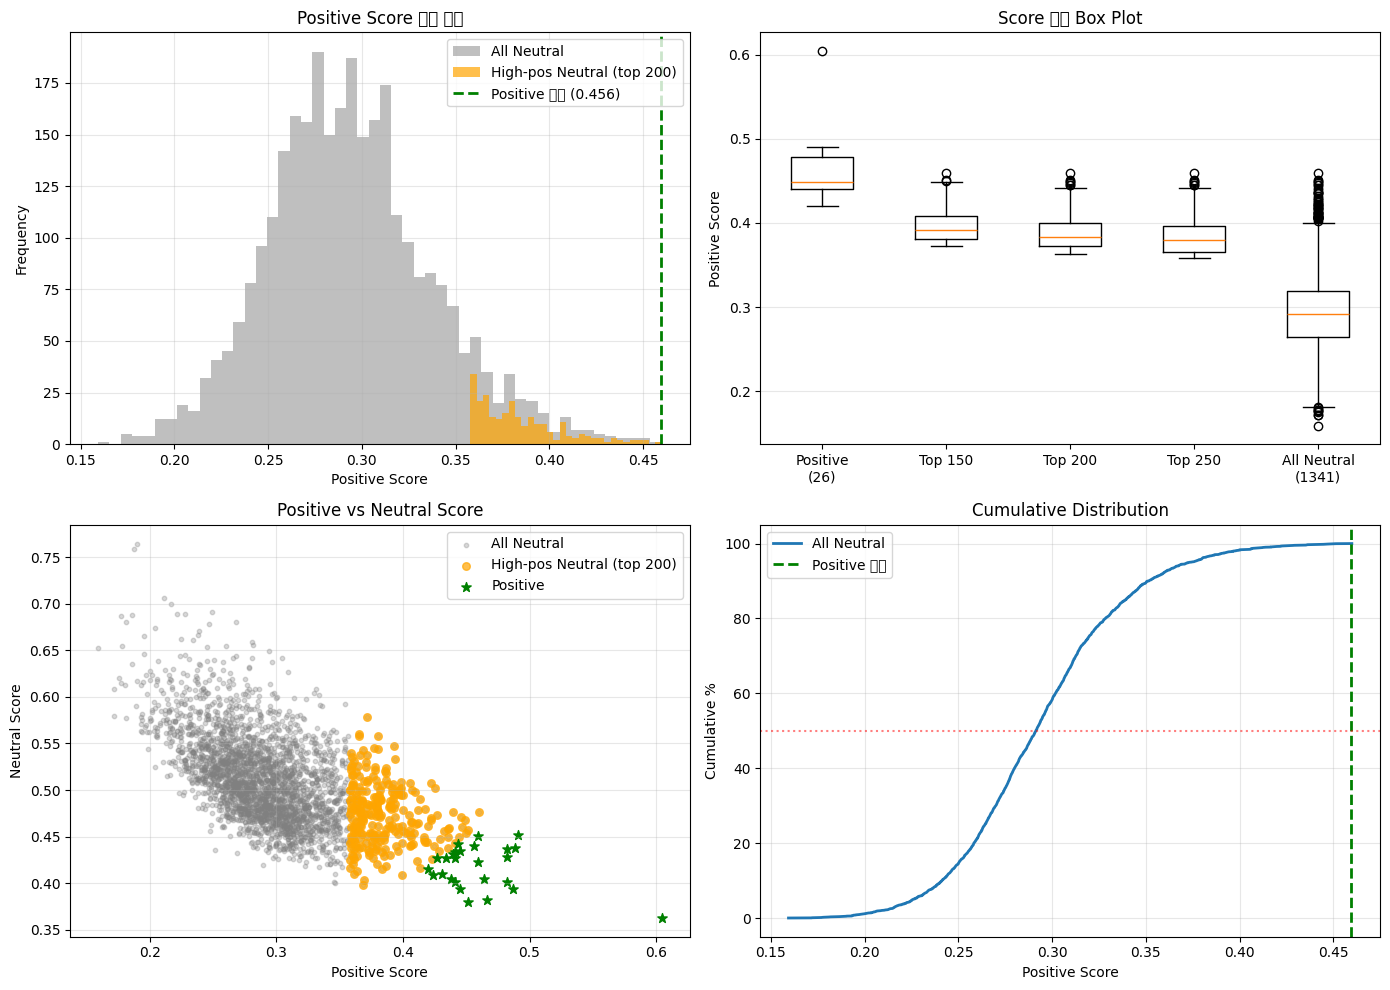

✓ 시각화 저장: korea_positive_score_analysis.png


In [ ]:
print("\n" + "=" * 80)
print("📊 Score 분포 시각화")
print("=" * 80)

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Positive score 분포
ax1 = axes[0, 0]
ax1.hist(neutral_df['sentiment_positive'], bins=50, alpha=0.5, label='All Neutral', color='gray')
ax1.hist(high_200['sentiment_positive'], bins=30, alpha=0.7, label='High-pos Neutral (top 200)', color='orange')
ax1.axvline(positive_df['sentiment_positive'].mean(), color='green', linestyle='--', linewidth=2, label='Positive 평균 (0.456)')
ax1.set_xlabel('Positive Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Positive Score 분포 비교')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Box plot
ax2 = axes[0, 1]
data_to_plot = [
    positive_df['sentiment_positive'],
    high_50['sentiment_positive'],
    high_100['sentiment_positive'],
    high_200['sentiment_positive'],
    neutral_df['sentiment_positive']
]
ax2.boxplot(data_to_plot, labels=['Positive\n(26)', 'Top 150', 'Top 200', 'Top 250', 'All Neutral\n(1341)'])
ax2.set_ylabel('Positive Score')
ax2.set_title('Score 분포 Box Plot')
ax2.grid(axis='y', alpha=0.3)

# 3. Scatter plot (Positive vs Neutral score)
ax3 = axes[1, 0]
ax3.scatter(neutral_df['sentiment_positive'], neutral_df['sentiment_neutral'],
           alpha=0.3, s=10, label='All Neutral', color='gray')
ax3.scatter(high_200['sentiment_positive'], high_200['sentiment_neutral'],
           alpha=0.7, s=30, label='High-pos Neutral (top 200)', color='orange')
ax3.scatter(positive_df['sentiment_positive'], positive_df['sentiment_neutral'],
           s=50, label='Positive', color='green', marker='*')
ax3.set_xlabel('Positive Score')
ax3.set_ylabel('Neutral Score')
ax3.set_title('Positive vs Neutral Score')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Cumulative distribution
ax4 = axes[1, 1]
sorted_neutral = np.sort(neutral_df['sentiment_positive'])
cumulative = np.arange(1, len(sorted_neutral) + 1) / len(sorted_neutral) * 100
ax4.plot(sorted_neutral, cumulative, label='All Neutral', linewidth=2)
ax4.axvline(positive_df['sentiment_positive'].mean(), color='green',
           linestyle='--', linewidth=2, label='Positive 평균')
ax4.axhline(50, color='red', linestyle=':', alpha=0.5)
ax4.set_xlabel('Positive Score')
ax4.set_ylabel('Cumulative %')
ax4.set_title('Cumulative Distribution')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('korea_positive_score_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 시각화 저장: korea_positive_score_analysis.png")

In [ ]:
print("=" * 80)
print("📊 250개 확장 분석")
print("=" * 80)

# ESG 전체 사용
positive_df = kr_all_df[kr_all_df['sentiment_label'] == 'positive'].copy()
neutral_df = kr_all_df[kr_all_df['sentiment_label'] == 'neutral'].copy()

# Neutral을 positive score로 정렬
neutral_sorted = neutral_df.sort_values('sentiment_positive', ascending=False)

# 200개 추출
high_250 = neutral_sorted.head(250)

print("\n✨ High-pos Neutral (상위 250개) 통계:")
print(f"  최저: {high_250['sentiment_positive'].min():.3f}")
print(f"  평균: {high_250['sentiment_positive'].mean():.3f}")
print(f"  중앙값: {high_250['sentiment_positive'].median():.3f}")
print(f"  최고: {high_250['sentiment_positive'].max():.3f}")

print("\n📊 비교:")
print(f"  진짜 Positive (n=19): 평균 {positive_df['sentiment_positive'].mean():.3f}")
print(f"  High-pos Neutral (n=250): 평균 {high_250['sentiment_positive'].mean():.3f}")
print(f"  차이: {positive_df['sentiment_positive'].mean() - high_200['sentiment_positive'].mean():.3f}")

# 0.35 이상 체크
above_35 = high_250[high_250['sentiment_positive'] >= 0.35]
print(f"\n🎯 0.35 이상 기사:")
print(f"  250개 중: {len(above_35)}개 ({len(above_35)/200*100:.1f}%)")

# 0.40 이상도 체크
above_40 = high_250[high_250['sentiment_positive'] >= 0.40]
print(f"\n🎯 0.40 이상 기사:")
print(f"  250개 중: {len(above_40)}개 ({len(above_40)/200*100:.1f}%)")

# 진짜 positive 최저점(0.420)과 비교
above_pos_min = high_250[high_250['sentiment_positive'] >= positive_df['sentiment_positive'].min()]
print(f"\n🎯 진짜 Positive 최저점(0.420) 이상:")
print(f"  250개 중: {len(above_pos_min)}개 ({len(above_pos_min)/250*100:.1f}%)")
print(f"  → 이 {len(above_pos_min)}개는 진짜 positive보다 점수 높음!")

print("\n💡 결론:")
if high_200['sentiment_positive'].min() >= 0.35:
    print(f"  ✅ 200개 전부 0.35 이상! (최저: {high_250['sentiment_positive'].min():.3f})")
    print(f"  → '한국형 긍정' 패턴 강력!")
else:
    print(f"  ⚠️ 일부는 0.35 미만 (최저: {high_250['sentiment_positive'].min():.3f})")
    print(f"  → 하지만 평균은 {high_250['sentiment_positive'].mean():.3f}로 여전히 높음!")

📊 250개 확장 분석

✨ High-pos Neutral (상위 250개) 통계:
  최저: 0.358
  평균: 0.384
  중앙값: 0.380
  최고: 0.460

📊 비교:
  진짜 Positive (n=19): 평균 0.459
  High-pos Neutral (n=250): 평균 0.384
  차이: 0.075

🎯 0.35 이상 기사:
  250개 중: 250개 (125.0%)

🎯 0.40 이상 기사:
  250개 중: 52개 (26.0%)

🎯 진짜 Positive 최저점(0.420) 이상:
  250개 중: 23개 (9.2%)
  → 이 23개는 진짜 positive보다 점수 높음!

💡 결론:
  ✅ 200개 전부 0.35 이상! (최저: 0.358)
  → '한국형 긍정' 패턴 강력!


In [ ]:
print("\n" + "=" * 80)
print("📰 250개 샘플 확인 (10개씩 구간별)")
print("=" * 80)

def safe_title(value):
    """NaN이나 float이면 안전하게 문자열로 변환"""
    if pd.isna(value):
        return "제목없음"
    return str(value)

# 1-50위
print("\n🥇 1-50위 (최고 positive score):")
for idx, row in high_250.head(50).iterrows():
    title = safe_title(row['title'])
    print(f"{title[:60]}... (Pos={row['sentiment_positive']:.3f}, Neu={row['sentiment_neutral']:.3f})")

# 55-95위
print("\n🥈 55-95위 (중간):")
for idx, row in high_250.iloc[55:95].iterrows():
    title = safe_title(row['title'])
    print(f"{title[:60]}... (Pos={row['sentiment_positive']:.3f}, Neu={row['sentiment_neutral']:.3f})")

# 105-155위
print("\n🥉 105-155위 (중하):")
for idx, row in high_250.iloc[105:155].iterrows():
    title = safe_title(row['title'])
    print(f"{title[:60]}... (Pos={row['sentiment_positive']:.3f}, Neu={row['sentiment_neutral']:.3f})")

# 210-250위 (최하)
print("\n📉 191-250위 (최저 positive score):")
for idx, row in high_250.tail(60).iterrows():
    title = safe_title(row['title'])
    print(f"{title[:60]}... (Pos={row['sentiment_positive']:.3f}, Neu={row['sentiment_neutral']:.3f})")


📰 250개 샘플 확인 (10개씩 구간별)

🥇 1-50위 (최고 positive score):
'IFA 2023' 개막 삼성 LG, 스마트홈 친환경 프리미엄으로 유럽 매료... (Pos=0.460, Neu=0.476)
LG 가전이 잘 팔리는 의외의 나라 에어컨 공조 앞세워 1위 노린다... (Pos=0.451, Neu=0.457)
KCC글라스, 이사회 내 ESG위원회 신설... (Pos=0.450, Neu=0.454)
LGU+, 에트비트 작업장에 스마트 안전 솔루션 보급한다... (Pos=0.449, Neu=0.468)
애플 아이폰의 '두뇌'를 만든 엔지니어가 창업한 이유 [긱스]... (Pos=0.447, Neu=0.460)
[MWC 2023] 유영상 SKT 대표 “AI로 대전환 선도 ‘모두를 위한 AI’ 만들 것”... (Pos=0.446, Neu=0.471)
GS리테일, '탄소중립포인트' 누적 3000만원 돌파... (Pos=0.445, Neu=0.449)
HD현대, 철강ㆍ해운과 손잡고 바다 위 탄소중립 나선다... (Pos=0.441, Neu=0.443)
[fn마켓워치]글랜우드PE, 한국유리공업 매각 5904억에 마무리... (Pos=0.439, Neu=0.476)
[fn마켓워치]SV인베 인수 '비엠씨', 오희근 전 콘티넨탈코리아 대표 CEO로... (Pos=0.436, Neu=0.459)
현대캐피탈, GS칼텍스와 전기차 특화 서비스 협력 강화 위해 맞손... (Pos=0.436, Neu=0.458)
포스코퓨처엠, 필리핀서 니켈 생산 친환경 제련기술 활용... (Pos=0.436, Neu=0.450)
비엣젯항공 창립자 만난 누빅스, K-혁신사절단 '탄소 비즈니스'... (Pos=0.435, Neu=0.438)
[인터뷰] 박경일 SK에코플랜트 대표, "폐 배터리 사업으로 美 시장 공략할 것" [CES 2023]... (Pos=0.432, Neu=0.456)
군인공제회 LIG넥스원 IBK캐피탈, 방산 혁신 펀드 결성... (Pos=0.429, Neu=0

In [ ]:
print("=" * 80)
print("🔬 COMPARATIVE TF-IDF: High-pos Neutral vs 일반 Neutral")
print("=" * 80)

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# High-pos Neutral 250개
high_250_texts = high_250['analysis_text'].astype(str).tolist()

# 일반 Neutral (251위 ~ 끝)
normal_neutral = neutral_sorted.iloc[250:]
normal_neutral_texts = normal_neutral['analysis_text'].astype(str).tolist()

print(f"\n비교 대상:")
print(f"  High-pos Neutral: {len(high_250_texts)}개")
print(f"  일반 Neutral: {len(normal_neutral_texts)}개")

# 전체 vocabulary 구축
all_texts = high_250_texts + normal_neutral_texts

vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9
)

vectorizer.fit(all_texts)

# 각각 TF-IDF
high_tfidf = vectorizer.transform(high_250_texts).mean(axis=0)
normal_tfidf = vectorizer.transform(normal_neutral_texts).mean(axis=0)

# 차이 계산
diff = np.array(high_tfidf - normal_tfidf).flatten()

feature_names = vectorizer.get_feature_names_out()

# High-pos에 특징적인 단어 (차이가 큰 순)
top_indices = diff.argsort()[-40:][::-1]

print("\n✨ High-pos Neutral에 특징적인 단어 (vs 일반 Neutral):")
print(f"{'순위':<4} {'키워드':<35} {'차이':<10} {'High-pos':<10} {'일반':<10}")
print("─" * 75)

for i, idx in enumerate(top_indices, 1):
    if diff[idx] > 0:  # High-pos에 더 많은 것만
        keyword = feature_names[idx]
        difference = diff[idx]
        high_score = high_tfidf[0, idx]
        normal_score = normal_tfidf[0, idx]

        print(f"{i:<4} {keyword:<35} {difference:.4f}     {high_score:.4f}     {normal_score:.4f}")

🔬 COMPARATIVE TF-IDF: High-pos Neutral vs 일반 Neutral

비교 대상:
  High-pos Neutral: 250개
  일반 Neutral: 2723개

✨ High-pos Neutral에 특징적인 단어 (vs 일반 Neutral):
순위   키워드                                 차이         High-pos   일반        
───────────────────────────────────────────────────────────────────────────
1    ai                                  0.0294     0.0431     0.0137
2    스타트업                                0.0285     0.0380     0.0094
3    서비스                                 0.0272     0.0448     0.0176
4    솔루션                                 0.0256     0.0352     0.0097
5    데이터                                 0.0184     0.0273     0.0089
6    전기차                                 0.0179     0.0232     0.0052
7    플랫폼                                 0.0175     0.0293     0.0118
8    스마트                                 0.0164     0.0222     0.0058
9    lg전자                                0.0162     0.0191     0.0029
10   lg                                  0.0155     0.0199     0.004

In [ ]:
print("=" * 80)
print("🔤 형태소 분석으로 동사 자동 추출")
print("=" * 80)

# 1단계: KoNLPy 설치 (한국어 형태소 분석기)
print("\n1️⃣ KoNLPy 설치 시도...")

try:
    from konlpy.tag import Okt
    print("✅ KoNLPy 이미 설치되어 있음!")
except ImportError:
    print("📦 KoNLPy 설치 중...")
    import subprocess
    subprocess.run(["pip", "install", "konlpy", "-q"])

    # Java 설치 체크 (KoNLPy 필요)
    try:
        subprocess.run(["java", "-version"], capture_output=True)
        print("✅ Java 설치 확인")
    except:
        print("⚠️ Java 설치 필요 - apt-get install default-jdk")
        subprocess.run(["apt-get", "install", "-y", "default-jdk"], capture_output=True)

    from konlpy.tag import Okt
    print("✅ KoNLPy 설치 완료!")

# 2단계: 형태소 분석기 초기화
okt = Okt()
print("✅ 형태소 분석기 준비 완료!")

🔤 형태소 분석으로 동사 자동 추출

1️⃣ KoNLPy 설치 시도...
📦 KoNLPy 설치 중...
✅ Java 설치 확인
✅ KoNLPy 설치 완료!
✅ 형태소 분석기 준비 완료!


In [ ]:
print("=" * 80)
print("🎯 완전형 동사만 추출 (-다로 끝나는 것)")
print("=" * 80)

from collections import Counter
from konlpy.tag import Okt

okt = Okt()

# High-pos Neutral에서 동사 추출
print("\n분석 중...")

high_verbs_all = []
for text in high_250_texts:
    pos_tags = okt.pos(text)
    # Verb(동사)만 추출하고, -다로 끝나는 것만
    verbs = [word for word, pos in pos_tags if pos == 'Verb' and word.endswith('다')]
    high_verbs_all.extend(verbs)

# 일반 Neutral에서 동사 추출
normal_verbs_all = []
for text in normal_neutral_texts:
    pos_tags = okt.pos(text)
    verbs = [word for word, pos in pos_tags if pos == 'Verb' and word.endswith('다')]
    normal_verbs_all.extend(verbs)

print(f"✅ 완전형 동사 추출 완료!")
print(f"   High-pos (100개): {len(high_verbs_all)}개 동사")
print(f"   일반 Neutral (100개): {len(normal_verbs_all)}개 동사")

# 빈도 계산
high_verb_freq = Counter(high_verbs_all)
normal_verb_freq = Counter(normal_verbs_all)

# 공통 동사 찾기
common_verbs = set([v for v, c in high_verb_freq.most_common(50)]) & \
               set([v for v, c in normal_verb_freq.most_common(50)])

print(f"   공통 고빈도 동사: {len(common_verbs)}개")

# 비교
print("\n" + "=" * 80)
print("📊 공통 완전형 동사 빈도 비교")
print("=" * 80)
print(f"\n{'순위':<4} {'동사':<18} {'High-pos':<12} {'일반':<12} {'비율':<10}")
print("─" * 60)

verb_comparison = []
for verb in common_verbs:
    h_count = high_verb_freq[verb]
    n_count = normal_verb_freq[verb]

    h_avg = h_count / 100  # 100개 샘플 기준
    n_avg = n_count / 100

    ratio = h_avg / n_avg if n_avg > 0 else 0

    verb_comparison.append({
        'verb': verb,
        'high_avg': h_avg,
        'normal_avg': n_avg,
        'ratio': ratio
    })

# 비율 1.0에 가까운 순 정렬
verb_comparison.sort(key=lambda x: abs(x['ratio'] - 1.0))

for i, item in enumerate(verb_comparison[:30], 1):
    print(f"{i:<4} {item['verb']:<18} {item['high_avg']:>10.2f}  {item['normal_avg']:>10.2f}  {item['ratio']:>8.2f}")

print("\n✅ 깔끔한 완전형 동사만!")

🎯 완전형 동사만 추출 (-다로 끝나는 것)

분석 중...
✅ 완전형 동사 추출 완료!
   High-pos (100개): 383개 동사
   일반 Neutral (100개): 3981개 동사
   공통 고빈도 동사: 24개

📊 공통 완전형 동사 빈도 비교

순위   동사                 High-pos     일반           비율        
────────────────────────────────────────────────────────────
1    열렸다                      0.03        0.10      0.30
2    됐습니다                     0.02        0.07      0.29
3    만든다                      0.04        0.14      0.29
4    않았다                      0.02        0.09      0.22
5    세웠다                      0.02        0.09      0.22
6    잡았다                      0.02        0.09      0.22
7    나선다                      0.16        0.79      0.20
8    돕는다                      0.02        0.11      0.18
9    되었습니다                    0.02        0.11      0.18
10   쏠린다                      0.01        0.06      0.17
11   한다                       0.33        2.17      0.15
12   서다                       0.03        0.22      0.14
13   높인다                      0.01        0.08 

In [ ]:
print("=" * 80)
print("🔧 보조동사 제거 후 재분석")
print("=" * 80)

# 제외할 보조동사
auxiliary_verbs = ['했다', '한다', '하다', '되다', '됐다', '된다', '이다', '있다',
                   '보다', '주다', '가다', '오다', '싶다', '같다', '합니다']

# 필터링
verb_comparison_filtered = []
for item in verb_comparison:
    if item['verb'] not in auxiliary_verbs:
        verb_comparison_filtered.append(item)

print(f"\n✅ 보조동사 제거 완료!")
print(f"   원래: {len(verb_comparison)}개")
print(f"   필터링 후: {len(verb_comparison_filtered)}개")

# 다시 정렬
verb_comparison_filtered.sort(key=lambda x: abs(x['ratio'] - 1.0))

print("\n" + "=" * 80)
print("📊 구체적 동사만 (보조동사 제외)")
print("=" * 80)
print(f"\n{'순위':<4} {'동사':<18} {'High-pos':<12} {'일반':<12} {'비율':<10}")
print("─" * 60)

for i, item in enumerate(verb_comparison_filtered[:20], 1):
    print(f"{i:<4} {item['verb']:<18} {item['high_avg']:>10.2f}  {item['normal_avg']:>10.2f}  {item['ratio']:>8.2f}")

print("\n✅ 훨씬 깔끔!")

🔧 보조동사 제거 후 재분석

✅ 보조동사 제거 완료!
   원래: 24개
   필터링 후: 18개

📊 구체적 동사만 (보조동사 제외)

순위   동사                 High-pos     일반           비율        
────────────────────────────────────────────────────────────
1    열렸다                      0.03        0.10      0.30
2    됐습니다                     0.02        0.07      0.29
3    만든다                      0.04        0.14      0.29
4    않았다                      0.02        0.09      0.22
5    세웠다                      0.02        0.09      0.22
6    잡았다                      0.02        0.09      0.22
7    나선다                      0.16        0.79      0.20
8    돕는다                      0.02        0.11      0.18
9    되었습니다                    0.02        0.11      0.18
10   쏠린다                      0.01        0.06      0.17
11   서다                       0.03        0.22      0.14
12   높인다                      0.01        0.08      0.12
13   알려졌다                     0.01        0.11      0.09
14   하겠다                      0.03        0.34      0.09
15

In [ ]:
print("=" * 80)
print("🔥 최종: 전체 데이터 + 빈도 완화")
print("=" * 80)

from collections import Counter
from konlpy.tag import Okt

okt = Okt()

# 보조동사 리스트
auxiliary_verbs = ['했다', '한다', '하다', '되다', '됐다', '된다', '이다', '있다',
                   '보다', '주다', '가다', '오다', '싶다', '같다', '않다']

print("\n📊 전체 데이터 분석 중... (시간 걸림)")

# High-pos 250개 전체
high_verbs_all = []
for i, text in enumerate(high_250_texts):
    if (i + 1) % 50 == 0:
        print(f"   High-pos: {i+1}/250 완료...")
    pos_tags = okt.pos(text)
    verbs = [word for word, pos in pos_tags
             if pos == 'Verb' and word.endswith('다') and word not in auxiliary_verbs]
    high_verbs_all.extend(verbs)

# 일반 Neutral 500개 (전체는 너무 많으니)
normal_verbs_all = []
for i, text in enumerate(normal_neutral_texts[:500]):
    if (i + 1) % 100 == 0:
        print(f"   일반 Neutral: {i+1}/500 완료...")
    pos_tags = okt.pos(text)
    verbs = [word for word, pos in pos_tags
             if pos == 'Verb' and word.endswith('다') and word not in auxiliary_verbs]
    normal_verbs_all.extend(verbs)

print(f"\n✅ 추출 완료!")
print(f"   High-pos (200개): {len(high_verbs_all)}개 구체적 동사")
print(f"   일반 (500개): {len(normal_verbs_all)}개 구체적 동사")

# 빈도 계산
high_verb_freq = Counter(high_verbs_all)
normal_verb_freq = Counter(normal_verbs_all)

print(f"   High-pos unique 동사: {len(high_verb_freq)}개")
print(f"   일반 unique 동사: {len(normal_verb_freq)}개")

# 공통 동사 (Top 100 기준으로 완화)
common_verbs = set([v for v, c in high_verb_freq.most_common(100)]) & \
               set([v for v, c in normal_verb_freq.most_common(100)])

print(f"   공통 고빈도 동사: {len(common_verbs)}개")

# 비교
verb_comparison = []
for verb in common_verbs:
    h_count = high_verb_freq[verb]
    n_count = normal_verb_freq[verb]

    h_avg = h_count / 250  # 250개 기준
    n_avg = n_count / 500  # 500개 기준

    ratio = h_avg / n_avg if n_avg > 0 else 0

    verb_comparison.append({
        'verb': verb,
        'high_avg': h_avg,
        'normal_avg': n_avg,
        'ratio': ratio,
        'high_count': h_count,
        'normal_count': n_count
    })

# 비율 1.0에 가까운 순
verb_comparison.sort(key=lambda x: abs(x['ratio'] - 1.0))

print("\n" + "=" * 80)
print("📊 공통 구체적 동사 (보조동사 제외)")
print("=" * 80)
print(f"\n{'순위':<4} {'동사':<20} {'High(회)':<10} {'일반(회)':<10} {'비율':<10}")
print("─" * 60)

for i, item in enumerate(verb_comparison[:40], 1):
    print(f"{i:<4} {item['verb']:<20} {item['high_count']:>8.2f}  {item['normal_count']:>8.2f}  {item['ratio']:>8.2f}")

print("\n" + "=" * 80)

🔥 최종: 전체 데이터 + 빈도 완화

📊 전체 데이터 분석 중... (시간 걸림)
   High-pos: 50/250 완료...
   High-pos: 100/250 완료...
   High-pos: 150/250 완료...
   High-pos: 200/250 완료...
   High-pos: 250/250 완료...
   일반 Neutral: 100/500 완료...
   일반 Neutral: 200/500 완료...
   일반 Neutral: 300/500 완료...
   일반 Neutral: 400/500 완료...
   일반 Neutral: 500/500 완료...

✅ 추출 완료!
   High-pos (200개): 228개 구체적 동사
   일반 (500개): 461개 구체적 동사
   High-pos unique 동사: 79개
   일반 unique 동사: 125개
   공통 고빈도 동사: 38개

📊 공통 구체적 동사 (보조동사 제외)

순위   동사                   High(회)    일반(회)      비율        
────────────────────────────────────────────────────────────
1    넘겼다                      1.00      2.00      1.00
2    받았다                      2.00      4.00      1.00
3    만들겠다                     1.00      2.00      1.00
4    심는다                      1.00      2.00      1.00
5    알려졌다                     1.00      2.00      1.00
6    되었습니다                    2.00      4.00      1.00
7    밝혔다                     95.00    236.00      0.81
8    돕는다  

### TF-IDF가 보여주는 것:
High-pos Neutral의 "내용(content)" 차이:
- 혁신 주제 (스타트업, AI)
- 친환경 주제 (전기차, 탄소)
- 글로벌 확장 (베트남, 유치)

= "무엇에 대한 뉴스인가?" (WHAT)

### TF-IDF가 안 보여주는 것:
"표현 방식(framing)" 차이:
- 발표, 체결 같은 중립 동사
- 왜냐면 둘 다 비슷하게 사용

= "어떻게 말하는가?" (HOW)

In [ ]:
print("=" * 80)
print("🔍 영국 Neutral 분석 (Extreme Case - 12.4%)")
print("=" * 80)

# 데이터 준비
uk_negative = uk_all_df[uk_all_df['sentiment_label'] == 'negative']
uk_neutral = uk_all_df[uk_all_df['sentiment_label'] == 'neutral']

print("\n📊 기본 통계:")
print(f"  전체: {len(uk_all_df):,}개")
print(f"  Negative: {len(uk_negative):,}개 ({len(uk_negative)/len(uk_all_df)*100:.1f}%)")
print(f"  Neutral: {len(uk_neutral):,}개 ({len(uk_neutral)/len(uk_all_df)*100:.1f}%)")

print("\n💡 비교:")
print(f"  🇰🇷 한국: Positive 0.9% (희귀)")
print(f"  🇬🇧 영국: Neutral 12.4% (희귀)")
print(f"  → 영국은 왜 이것들만 neutral?")

# 카테고리별
print(f"\n📊 카테고리별 Neutral:")
for cat in ['E', 'S', 'G']:
    cat_total = len(uk_all_df[uk_all_df['esg_category'] == cat])
    cat_neutral = uk_neutral[uk_neutral['esg_category'] == cat]
    pct = len(cat_neutral) / cat_total * 100
    print(f"  {cat}: {len(cat_neutral):,}개 / {cat_total:,}개 ({pct:.1f}%)")

# Score 분포
print(f"\n📊 Sentiment Score 분석:")
print(f"  평균 neutral score: {uk_neutral['sentiment_neutral'].mean():.3f}")
print(f"  평균 positive score: {uk_neutral['sentiment_positive'].mean():.3f}")
print(f"  평균 negative score: {uk_neutral['sentiment_negative'].mean():.3f}")

print(f"\n  범위:")
print(f"    Neutral: {uk_neutral['sentiment_neutral'].min():.3f} ~ {uk_neutral['sentiment_neutral'].max():.3f}")

# High confidence
high_conf = uk_neutral[uk_neutral['sentiment_neutral'] > 0.5]
print(f"\n  High confidence (>0.5): {len(high_conf)}개 ({len(high_conf)/len(uk_neutral)*100:.1f}%)")
print(f"  Low confidence (<=0.5): {len(uk_neutral) - len(high_conf)}개 ({(len(uk_neutral)-len(high_conf))/len(uk_neutral)*100:.1f}%)")

print("\n" + "=" * 80)

🔍 영국 Neutral 분석 (Extreme Case - 12.4%)


NameError: name 'uk_all_df' is not defined

### Step 3-2: Keyword & Framing

In [ ]:
print("=" * 80)
print("🇬🇧 영국 ESG 전체 (E+S+G) NEGATIVE 분석")
print("=" * 80)

# 영국 데이터 통합
uk_e_df = processed_data['uk']['E'].copy()
uk_s_df = processed_data['uk']['S'].copy()
uk_g_df = processed_data['uk']['G'].copy()

uk_e_df['esg_category'] = 'E'
uk_s_df['esg_category'] = 'S'
uk_g_df['esg_category'] = 'G'

uk_all_df = pd.concat([uk_e_df, uk_s_df, uk_g_df], ignore_index=True)

print(f"\n📊 영국 ESG 전체:")
print(f"  E: {len(uk_e_df):,}개")
print(f"  S: {len(uk_s_df):,}개")
print(f"  G: {len(uk_g_df):,}개")
print(f"  전체: {len(uk_all_df):,}개")

# Sentiment 분포
print(f"\n📊 Sentiment 분포:")
sentiment_dist = uk_all_df['sentiment_label'].value_counts()
for label, count in sentiment_dist.items():
    pct = count / len(uk_all_df) * 100
    print(f"  {label}: {count:,}개 ({pct:.1f}%)")

# 카테고리별
print(f"\n📊 카테고리별 Negative:")
for cat in ['E', 'S', 'G']:
    cat_df = uk_all_df[uk_all_df['esg_category'] == cat]
    cat_neg = cat_df[cat_df['sentiment_label'] == 'negative']
    pct = len(cat_neg) / len(cat_df) * 100
    print(f"  {cat}: {len(cat_neg):,}개 ({pct:.1f}%)")

🇬🇧 영국 ESG 전체 (E+S+G) NEGATIVE 분석

📊 영국 ESG 전체:
  E: 5,944개
  S: 336개
  G: 141개
  전체: 6,421개

📊 Sentiment 분포:
  negative: 5,661개 (88.2%)
  neutral: 759개 (11.8%)
  positive: 1개 (0.0%)

📊 카테고리별 Negative:
  E: 5,204개 (87.6%)
  S: 325개 (96.7%)
  G: 132개 (93.6%)


In [ ]:
print("\n" + "=" * 80)
print("🔬 COMPARATIVE TF-IDF: Negative vs Neutral (영국)")
print("=" * 80)
from sklearn.feature_extraction.text import TfidfVectorizer

negative_df = uk_all_df[uk_all_df['sentiment_label'] == 'negative']
neutral_df = uk_all_df[uk_all_df['sentiment_label'] == 'neutral']

negative_texts = negative_df['analysis_text'].astype(str).tolist()
neutral_texts = neutral_df['analysis_text'].astype(str).tolist()

print(f"\n비교 대상:")
print(f"  Negative: {len(negative_texts):,}개")
print(f"  Neutral: {len(neutral_texts):,}개")

# 전체 vocabulary 구축
all_texts = negative_texts + neutral_texts

vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    min_df=5,  # 최소 5번 등장
    max_df=0.9,
    stop_words='english'  # 영어 불용어 제거
)

vectorizer.fit(all_texts)

# 각각 TF-IDF
negative_tfidf = vectorizer.transform(negative_texts).mean(axis=0)
neutral_tfidf = vectorizer.transform(neutral_texts).mean(axis=0)

# 차이 계산
diff = np.array(negative_tfidf - neutral_tfidf).flatten()

feature_names = vectorizer.get_feature_names_out()

# Negative에 특징적인 단어 (차이가 큰 순)
top_indices = diff.argsort()[-50:][::-1]

print("\n✨ Negative에 특징적인 키워드 (vs Neutral):")
print(f"{'순위':<4} {'키워드':<35} {'차이':<10} {'Negative':<10} {'Neutral':<10}")
print("─" * 75)

for i, idx in enumerate(top_indices, 1):
    if diff[idx] > 0:  # Negative에 더 많은 것만
        keyword = feature_names[idx]
        difference = diff[idx]
        neg_score = negative_tfidf[0, idx]
        neu_score = neutral_tfidf[0, idx]

        print(f"{i:<4} {keyword:<35} {difference:.4f}     {neg_score:.4f}     {neu_score:.4f}")


🔬 COMPARATIVE TF-IDF: Negative vs Neutral (영국)

비교 대상:
  Negative: 5,661개
  Neutral: 759개

✨ Negative에 특징적인 키워드 (vs Neutral):
순위   키워드                                 차이         Negative   Neutral   
───────────────────────────────────────────────────────────────────────────
1    climate                             0.0283     0.0738     0.0454
2    people                              0.0223     0.0416     0.0193
3    labour                              0.0195     0.0266     0.0070
4    party                               0.0183     0.0214     0.0030
5    says                                0.0150     0.0348     0.0198
6    trump                               0.0136     0.0157     0.0021
7    sunak                               0.0131     0.0155     0.0024
8    crisis                              0.0130     0.0245     0.0115
9    court                               0.0129     0.0146     0.0017
10   like                                0.0118     0.0245     0.0127
11   just              

In [ ]:
print("\n" + "=" * 80)
print("🔥 2단어 조합(Bigram)만 추출")
print("=" * 80)

vectorizer_bigram = TfidfVectorizer(
    max_features=500,
    ngram_range=(2, 2),  # 2단어만!
    min_df=5,
    max_df=0.9,
    stop_words='english'
)

vectorizer_bigram.fit(all_texts)

negative_tfidf_bi = vectorizer_bigram.transform(negative_texts).mean(axis=0)
neutral_tfidf_bi = vectorizer_bigram.transform(neutral_texts).mean(axis=0)

diff_bi = np.array(negative_tfidf_bi - neutral_tfidf_bi).flatten()
feature_names_bi = vectorizer_bigram.get_feature_names_out()

top_indices_bi = diff_bi.argsort()[-30:][::-1]

print("\n✨ Negative 특징 Bigram:")
print(f"{'순위':<4} {'Bigram':<35} {'차이':<10}")
print("─" * 55)

for i, idx in enumerate(top_indices_bi, 1):
    if diff_bi[idx] > 0:
        keyword = feature_names_bi[idx]
        difference = diff_bi[idx]
        print(f"{i:<4} {keyword:<35} {difference:.4f}")


🔥 2단어 조합(Bigram)만 추출

✨ Negative 특징 Bigram:
순위   Bigram                              차이        
───────────────────────────────────────────────────────
1    climate crisis                      0.0318
2    prime minister                      0.0209
3    year old                            0.0173
4    climate change                      0.0162
5    rishi sunak                         0.0138
6    human rights                        0.0134
7    far right                           0.0124
8    social media                        0.0120
9    donald trump                        0.0119
10   keir starmer                        0.0118
11   extreme weather                     0.0104
12   oil gas                             0.0101
13   net zero                            0.0098
14   climate emergency                   0.0095
15   climate action                      0.0090
16   guardian columnist                  0.0085
17   don know                            0.0084
18   cost living               

In [ ]:
print("=" * 80)
print("🎯 ESG 전체 비판적 Bigram 추출 (카테고리 구분 X)")
print("=" * 80)

# 제외할 패턴만
exclude_patterns = [
    # 정치인
    'sunak', 'keir starmer', 'donald trump', 'joe biden', 'johnson', 'white house',
    # 일반 표현
    'year old', 'years ago', 'don know', 'columnist',
    # 지명
    'new york', 'white house', 'north sea',
    # 너무 일반적
    'prime minister', 'social media', 'general election', 'labour party',
    'far right'  # 정치 성향
]

# ESG 관련 키워드 필터링
esg_bigrams = []

for idx in top_indices_bi[:50]:
    if diff_bi[idx] > 0:
        keyword = feature_names_bi[idx]

        # 제외 패턴 체크
        if any(pattern in keyword for pattern in exclude_patterns):
            continue

        difference = diff_bi[idx]
        esg_bigrams.append((keyword, difference))

print(f"\n✨ 영국 Negative 특징 Bigram (정제됨):")
print(f"{'순위':<4} {'Bigram':<35} {'차이':<10}")
print("─" * 55)

for i, (keyword, diff) in enumerate(esg_bigrams[:20], 1):
    print(f"{i:<4} {keyword:<35} {diff:.4f}")

🎯 ESG 전체 비판적 Bigram 추출 (카테고리 구분 X)

✨ 영국 Negative 특징 Bigram (정제됨):
순위   Bigram                              차이        
───────────────────────────────────────────────────────
1    climate crisis                      0.0318
2    climate change                      0.0162
3    human rights                        0.0134
4    extreme weather                     0.0104
5    oil gas                             0.0101
6    net zero                            0.0098
7    climate emergency                   0.0095
8    climate action                      0.0090
9    cost living                         0.0083
10   supreme court                       0.0079
11   stop oil                            0.0076
12   climate activists                   0.0076
13   just stop                           0.0076
14   climate breakdown                   0.0069


In [ ]:
print("=" * 80)
print("🔤 영어 동사 자동 추출 (품사 태깅)")
print("=" * 80)

import pandas as pd
import nltk
from collections import Counter

# ========== 1단계: 영국 데이터 준비 ==========
print("\n📊 영국 데이터 준비...")

try:
    # 변수 존재 확인
    print(f"✅ negative_texts: {len(negative_texts):,}개")
    print(f"✅ neutral_texts: {len(neutral_texts):,}개")
except NameError:
    # 없으면 만들기
    uk_e_df = processed_data['uk']['E'].copy()
    uk_s_df = processed_data['uk']['S'].copy()
    uk_g_df = processed_data['uk']['G'].copy()

    uk_e_df['esg_category'] = 'E'
    uk_s_df['esg_category'] = 'S'
    uk_g_df['esg_category'] = 'G'

    uk_all_df = pd.concat([uk_e_df, uk_s_df, uk_g_df], ignore_index=True)

    negative_df = uk_all_df[uk_all_df['sentiment_label'] == 'negative']
    neutral_df = uk_all_df[uk_all_df['sentiment_label'] == 'neutral']

    negative_texts = negative_df['analysis_text'].astype(str).tolist()
    neutral_texts = neutral_df['analysis_text'].astype(str).tolist()

    print(f"✅ 생성 완료!")
    print(f"   Negative: {len(negative_texts):,}개")
    print(f"   Neutral: {len(neutral_texts):,}개")

# ========== 2단계: NLTK 준비 (수정!) ==========
print("\n1️⃣ NLTK 준비...")

# 필요한 모든 패키지 다운로드
required_packages = [
    'punkt',
    'averaged_perceptron_tagger',
    'averaged_perceptron_tagger_eng'  # ← 이게 새로 필요!
]

for package in required_packages:
    try:
        nltk.data.find(f'tokenizers/{package}' if 'punkt' in package else f'taggers/{package}')
        print(f"✅ {package} 이미 설치됨")
    except LookupError:
        print(f"📦 {package} 다운로드 중...")
        nltk.download(package, quiet=True)
        print(f"✅ {package} 완료!")

print("✅ NLTK 준비 완료!")

# ========== 3단계: 동사 추출 ==========
print("\n2️⃣ 동사 추출 중... (시간 걸릴 수 있음)")

negative_verbs_all = []
for i, text in enumerate(negative_texts[:500]):
    if (i + 1) % 100 == 0:
        print(f"   Negative: {i+1}/500...")

    try:
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = nltk.pos_tag(tokens)
        verbs = [word for word, pos in pos_tags
                 if pos.startswith('VB') and len(word) > 3]
        negative_verbs_all.extend(verbs)
    except Exception as e:
        # 에러 나는 텍스트 스킵
        continue

neutral_verbs_all = []
for i, text in enumerate(neutral_texts[:200]):
    if (i + 1) % 50 == 0:
        print(f"   Neutral: {i+1}/200...")

    try:
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = nltk.pos_tag(tokens)
        verbs = [word for word, pos in pos_tags
                 if pos.startswith('VB') and len(word) > 3]
        neutral_verbs_all.extend(verbs)
    except Exception as e:
        continue

print(f"\n✅ 추출 완료!")
print(f"   Negative (500개): {len(negative_verbs_all)}개 동사")
print(f"   Neutral (200개): {len(neutral_verbs_all)}개 동사")

# 빈도 계산
negative_verb_freq = Counter(negative_verbs_all)
neutral_verb_freq = Counter(neutral_verbs_all)

print(f"   Negative unique: {len(negative_verb_freq)}개")
print(f"   Neutral unique: {len(neutral_verb_freq)}개")

print("\n" + "=" * 80)

🔤 영어 동사 자동 추출 (품사 태깅)

📊 영국 데이터 준비...
✅ negative_texts: 5,661개
✅ neutral_texts: 759개

1️⃣ NLTK 준비...
✅ punkt 이미 설치됨
✅ averaged_perceptron_tagger 이미 설치됨
📦 averaged_perceptron_tagger_eng 다운로드 중...
✅ averaged_perceptron_tagger_eng 완료!
✅ NLTK 준비 완료!

2️⃣ 동사 추출 중... (시간 걸릴 수 있음)
   Negative: 100/500...
   Negative: 200/500...
   Negative: 300/500...
   Negative: 400/500...
   Negative: 500/500...
   Neutral: 50/200...
   Neutral: 100/200...
   Neutral: 150/200...
   Neutral: 200/200...

✅ 추출 완료!
   Negative (500개): 56835개 동사
   Neutral (200개): 18522개 동사
   Negative unique: 6973개
   Neutral unique: 3535개



In [ ]:
print("=" * 80)
print("📊 공통 고빈도 동사 비교")
print("=" * 80)

# 공통 동사 (둘 다 Top 100에 있는 것)
common_verbs = set([v for v, c in negative_verb_freq.most_common(100)]) & \
               set([v for v, c in neutral_verb_freq.most_common(100)])

print(f"\n공통 고빈도 동사: {len(common_verbs)}개")

# 비교
verb_comparison = []
for verb in common_verbs:
    neg_count = negative_verb_freq[verb]
    neu_count = neutral_verb_freq[verb]

    neg_avg = neg_count / 500  # 500개 샘플 기준
    neu_avg = neu_count / 200  # 200개 샘플 기준

    ratio = neg_avg / neu_avg if neu_avg > 0 else 0

    verb_comparison.append({
        'verb': verb,
        'neg_count': neg_count,
        'neu_count': neu_count,
        'neg_avg': neg_avg,
        'neu_avg': neu_avg,
        'ratio': ratio
    })

# 비율 순 정렬 (Negative에 훨씬 많은 것)
verb_comparison.sort(key=lambda x: x['ratio'], reverse=True)

print(f"\n🔥 Negative에 특징적인 동사 (비율 높은 순 Top 30):")
print(f"{'순위':<4} {'동사':<18} {'Neg 총':<10} {'Neu 총':<10} {'비율':<10}")
print("─" * 60)

for i, item in enumerate(verb_comparison[:30], 1):
    print(f"{i:<4} {item['verb']:<18} {item['neg_count']:>8}  {item['neu_count']:>8}  {item['ratio']:>8.1f}x")

📊 공통 고빈도 동사 비교

공통 고빈도 동사: 76개

🔥 Negative에 특징적인 동사 (비율 높은 순 Top 30):
순위   동사                 Neg 총      Neu 총      비율        
────────────────────────────────────────────────────────────
1    told                    220        33       2.7x
2    seen                    140        28       2.0x
3    want                    218        45       1.9x
4    called                  196        42       1.9x
5    going                   293        65       1.8x
6    come                    202        47       1.7x
7    think                   196        47       1.7x
8    does                    177        44       1.6x
9    taking                  136        34       1.6x
10   given                   162        41       1.6x
11   know                    148        38       1.6x
12   work                    120        32       1.5x
13   meet                    157        42       1.5x
14   been                   1132       305       1.5x
15   give                    100        27       1.5x
16

In [ ]:
print("=" * 80)
print("🔬 가장 부정적인 기사 1,000개에서 품사별 단어 추출")
print("=" * 80)

import pandas as pd
import nltk
from collections import Counter

# ========== 1단계: 가장 부정적인 기사 선정 ==========
print("\n📊 가장 부정적인 기사 추출...")

# Negative 데이터 준비
try:
    negative_df
except NameError:
    uk_e_df = processed_data['uk']['E'].copy()
    uk_s_df = processed_data['uk']['S'].copy()
    uk_g_df = processed_data['uk']['G'].copy()

    uk_e_df['esg_category'] = 'E'
    uk_s_df['esg_category'] = 'S'
    uk_g_df['esg_category'] = 'G'

    uk_all_df = pd.concat([uk_e_df, uk_s_df, uk_g_df], ignore_index=True)
    negative_df = uk_all_df[uk_all_df['sentiment_label'] == 'negative']
    neutral_df = uk_all_df[uk_all_df['sentiment_label'] == 'neutral']

# Negative score로 정렬 (높은 순)
negative_sorted = negative_df.sort_values('sentiment_negative', ascending=False)

print(f"✅ 전체 Negative: {len(negative_df):,}개")
print(f"   평균 negative score: {negative_df['sentiment_negative'].mean():.3f}")

# 상위 1,000개 (가장 확실한 negative)
top_1000_negative = negative_sorted.head(1000)

print(f"\n🔥 상위 1,000개 (가장 부정적):")
print(f"   Negative score 범위: {top_1000_negative['sentiment_negative'].min():.3f} ~ {top_1000_negative['sentiment_negative'].max():.3f}")
print(f"   평균 negative score: {top_1000_negative['sentiment_negative'].mean():.3f}")

top_1000_texts = top_1000_negative['analysis_text'].astype(str).tolist()

# ========== 2단계: 품사별 단어 추출 ==========
print("\n📝 품사별 단어 추출 중... (시간 걸릴 수 있음)")

verbs = []       # 동사
adjectives = []  # 형용사
adverbs = []     # 부사
nouns = []       # 명사

for i, text in enumerate(top_1000_texts):
    if (i + 1) % 200 == 0:
        print(f"   진행: {i+1}/1,000...")

    try:
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = nltk.pos_tag(tokens)

        for word, pos in pos_tags:
            if len(word) > 3:  # 3글자 이상
                if pos.startswith('VB'):      # 동사
                    verbs.append(word)
                elif pos.startswith('JJ'):    # 형용사
                    adjectives.append(word)
                elif pos.startswith('RB'):    # 부사
                    adverbs.append(word)
                elif pos.startswith('NN'):    # 명사
                    nouns.append(word)
    except:
        continue

print(f"\n✅ 추출 완료!")
print(f"   동사: {len(verbs):,}개 (unique: {len(set(verbs)):,})")
print(f"   형용사: {len(adjectives):,}개 (unique: {len(set(adjectives)):,})")
print(f"   부사: {len(adverbs):,}개 (unique: {len(set(adverbs)):,})")
print(f"   명사: {len(nouns):,}개 (unique: {len(set(nouns)):,})")

# 빈도 계산
verb_freq = Counter(verbs)
adj_freq = Counter(adjectives)
adv_freq = Counter(adverbs)
noun_freq = Counter(nouns)

print("\n" + "=" * 80)

🔬 가장 부정적인 기사 1,000개에서 품사별 단어 추출

📊 가장 부정적인 기사 추출...
✅ 전체 Negative: 5,661개
   평균 negative score: 0.500

🔥 상위 1,000개 (가장 부정적):
   Negative score 범위: 0.566 ~ 0.841
   평균 negative score: 0.627

📝 품사별 단어 추출 중... (시간 걸릴 수 있음)
   진행: 200/1,000...
   진행: 400/1,000...
   진행: 600/1,000...
   진행: 800/1,000...
   진행: 1000/1,000...

✅ 추출 완료!
   동사: 119,813개 (unique: 10,376)
   형용사: 86,949개 (unique: 10,841)
   부사: 29,604개 (unique: 1,636)
   명사: 255,744개 (unique: 21,336)



In [ ]:
print("📊 가장 부정적인 1,000개 기사의 품사별 고빈도 단어")
print("=" * 80)

# 1. 동사
print("\n🔵 동사 (Verbs) Top 30:")
print(f"{'순위':<4} {'동사':<20} {'빈도':<10}")
print("─" * 40)
for i, (word, count) in enumerate(verb_freq.most_common(30), 1):
    print(f"{i:<4} {word:<20} {count:>8}")

# 2. 형용사
print("\n🟢 형용사 (Adjectives) Top 30:")
print(f"{'순위':<4} {'형용사':<20} {'빈도':<10}")
print("─" * 40)
for i, (word, count) in enumerate(adj_freq.most_common(30), 1):
    print(f"{i:<4} {word:<20} {count:>8}")

# 3. 부사
print("\n🟡 부사 (Adverbs) Top 30:")
print(f"{'순위':<4} {'부사':<20} {'빈도':<10}")
print("─" * 40)
for i, (word, count) in enumerate(adv_freq.most_common(30), 1):
    print(f"{i:<4} {word:<20} {count:>8}")

# 4. 명사
print("\n🔴 명사 (Nouns) Top 30:")
print(f"{'순위':<4} {'명사':<20} {'빈도':<10}")
print("─" * 40)
for i, (word, count) in enumerate(noun_freq.most_common(30), 1):
    print(f"{i:<4} {word:<20} {count:>8}")

📊 가장 부정적인 1,000개 기사의 품사별 고빈도 단어

🔵 동사 (Verbs) Top 30:
순위   동사                   빈도        
────────────────────────────────────────
1    said                     5021
2    have                     4986
3    been                     2572
4    were                     1938
5    says                     1225
6    being                    1089
7    make                      883
8    including                 772
9    made                      676
10   going                     664
11   take                      627
12   told                      602
13   need                      575
14   want                      527
15   think                     527
16   stop                      480
17   know                      476
18   found                     417
19   does                      417
20   used                      414
21   according                 412
22   come                      400
23   become                    381
24   help                      377
25   called                 

In [ ]:
print("\n" + "=" * 80)
print("🎯 부정적 감성 단어 필터링")
print("=" * 80)

# 부정적 패턴 (확장)
negative_patterns = {
    # 위기/문제
    'crisis', 'threat', 'harm', 'damage', 'danger', 'risk', 'disaster',
    'emergency', 'breakdown', 'collapse', 'catastrophe',
    # 실패/나쁨
    'fail', 'failure', 'problem', 'issue', 'concern', 'trouble',
    'worst', 'worse', 'bad', 'poor', 'terrible', 'awful',
    # 심각함
    'serious', 'severe', 'critical', 'dire', 'grave', 'acute',
    # 부정/반대
    'wrong', 'false', 'illegal', 'unlawful', 'violation',
    'against', 'anti', 'oppose', 'reject', 'deny',
    # 비판
    'criticize', 'condemn', 'accuse', 'blame', 'attack',
    # 감소/손실
    'loss', 'decline', 'decrease', 'reduce', 'cut',
    # 고통
    'suffering', 'pain', 'struggle', 'hardship'
}

print("\n🔵 부정적 동사 (Top 20):")
neg_verbs = [(w, c) for w, c in verb_freq.most_common(100)
             if any(p in w for p in negative_patterns)]
for i, (word, count) in enumerate(neg_verbs[:20], 1):
    print(f"  {i:2d}. {word:<20} {count:>6}")

print("\n🟢 부정적 형용사 (Top 20):")
neg_adjs = [(w, c) for w, c in adj_freq.most_common(100)
            if any(p in w for p in negative_patterns)]
for i, (word, count) in enumerate(neg_adjs[:20], 1):
    print(f"  {i:2d}. {word:<20} {count:>6}")

print("\n🟡 부정적 부사 (Top 20):")
neg_advs = [(w, c) for w, c in adv_freq.most_common(100)
            if any(p in w for p in negative_patterns)]
for i, (word, count) in enumerate(neg_advs[:20], 1):
    print(f"  {i:2d}. {word:<20} {count:>6}")

print("\n🔴 부정적 명사 (Top 20):")
neg_nouns = [(w, c) for w, c in noun_freq.most_common(100)
             if any(p in w for p in negative_patterns)]
for i, (word, count) in enumerate(neg_nouns[:20], 1):
    print(f"  {i:2d}. {word:<20} {count:>6}")



🎯 부정적 감성 단어 필터링

🔵 부정적 동사 (Top 20):
   1. accused                 211
   2. failed                  193
   3. reduce                  188

🟢 부정적 형용사 (Top 20):
   1. poor                    197
   2. serious                 193
   3. dangerous               183
   4. wrong                   179
   5. worst                   155

🟡 부정적 부사 (Top 20):
   1. directly                 92
   2. seriously                73

🔴 부정적 명사 (Top 20):
   1. crisis                 1184
   2. issues                  378
   3. risk                    328
   4. director                315
   5. damage                  299
   6. issue                   289


In [ ]:
print("=" * 80)
print("🔬 Negative vs Neutral 품사별 비교 (가장 정확!)")
print("=" * 80)

# Neutral도 같은 방식으로 추출
print("\n📊 Neutral 상위 200개 추출 중...")

neutral_sorted = neutral_df.sort_values('sentiment_neutral', ascending=False)
top_200_neutral = neutral_sorted.head(200)
neutral_texts = top_200_neutral['analysis_text'].astype(str).tolist()

print("📝 Neutral 품사 추출 중...")

neu_verbs = []
neu_adjs = []
neu_advs = []
neu_nouns = []

for i, text in enumerate(neutral_texts):
    if (i + 1) % 50 == 0:
        print(f"   진행: {i+1}/200...")

    try:
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = nltk.pos_tag(tokens)

        for word, pos in pos_tags:
            if len(word) > 3:
                if pos.startswith('VB'): neu_verbs.append(word)
                elif pos.startswith('JJ'): neu_adjs.append(word)
                elif pos.startswith('RB'): neu_advs.append(word)
                elif pos.startswith('NN'): neu_nouns.append(word)
    except:
        continue

neu_verb_freq = Counter(neu_verbs)
neu_adj_freq = Counter(neu_adjs)
neu_adv_freq = Counter(neu_advs)
neu_noun_freq = Counter(neu_nouns)

print("\n✅ 완료!")

# ========== 비교 분석 ==========
print("\n" + "=" * 80)
print("🔥 Negative에 훨씬 많이 나타나는 단어 (비율 3배 이상)")
print("=" * 80)

# 동사
print("\n🔵 동사:")
print(f"{'동사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)

neg_specific_verbs = []
for verb, neg_count in verb_freq.most_common(100):
    neu_count = neu_verb_freq.get(verb, 0)

    # Negative에 훨씬 많고 (3배 이상) + 충분한 빈도 (50+)
    if neg_count >= 50 and neu_count > 0:
        ratio = neg_count / neu_count
        if ratio >= 3.0:
            neg_specific_verbs.append((verb, neg_count, neu_count, ratio))

# 비율 순 정렬
neg_specific_verbs.sort(key=lambda x: x[3], reverse=True)

for verb, neg, neu, ratio in neg_specific_verbs[:20]:
    print(f"{verb:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

# 형용사
print("\n🟢 형용사:")
print(f"{'형용사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)

neg_specific_adjs = []
for adj, neg_count in adj_freq.most_common(100):
    neu_count = neu_adj_freq.get(adj, 0)

    if neg_count >= 50 and neu_count > 0:
        ratio = neg_count / neu_count
        if ratio >= 3.0:
            neg_specific_adjs.append((adj, neg_count, neu_count, ratio))

neg_specific_adjs.sort(key=lambda x: x[3], reverse=True)

for adj, neg, neu, ratio in neg_specific_adjs[:20]:
    print(f"{adj:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

# 부사
print("\n🟡 부사:")
print(f"{'부사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)

neg_specific_advs = []
for adv, neg_count in adv_freq.most_common(100):
    neu_count = neu_adv_freq.get(adv, 0)

    if neg_count >= 30 and neu_count > 0:  # 부사는 기준 낮춤
        ratio = neg_count / neu_count
        if ratio >= 3.0:
            neg_specific_advs.append((adv, neg_count, neu_count, ratio))

neg_specific_advs.sort(key=lambda x: x[3], reverse=True)

for adv, neg, neu, ratio in neg_specific_advs[:20]:
    print(f"{adv:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

# 명사
print("\n🔴 명사:")
print(f"{'명사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)

neg_specific_nouns = []
for noun, neg_count in noun_freq.most_common(100):
    neu_count = neu_noun_freq.get(noun, 0)

    if neg_count >= 50 and neu_count > 0:
        ratio = neg_count / neu_count
        if ratio >= 3.0:
            neg_specific_nouns.append((noun, neg_count, neu_count, ratio))

neg_specific_nouns.sort(key=lambda x: x[3], reverse=True)

for noun, neg, neu, ratio in neg_specific_nouns[:20]:
    print(f"{noun:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n" + "=" * 80)

🔬 Negative vs Neutral 품사별 비교 (가장 정확!)

📊 Neutral 상위 200개 추출 중...
📝 Neutral 품사 추출 중...
   진행: 50/200...
   진행: 100/200...
   진행: 150/200...
   진행: 200/200...

✅ 완료!

🔥 Negative에 훨씬 많이 나타나는 단어 (비율 3배 이상)

🔵 동사:
동사                   Negative   Neutral    비율        
───────────────────────────────────────────────────────
feel                      207         1     207.0x
accused                   211         2     105.5x
labour                    158         2      79.0x
calling                   190         3      63.3x
doesn                     164         3      54.7x
vote                      164         3      54.7x
seems                     157         3      52.3x
think                     527        12      43.9x
lost                      219         5      43.8x
live                      170         4      42.5x
wants                     202         6      33.7x
stop                      480        15      32.0x
told                      602        21      28.7x
leave             

In [ ]:
print("=" * 80)
print("📊 Negative 특징 단어 카테고리 분류 (기존 결과 기반)")
print("=" * 80)

# ========== 카테고리 정의 ==========

# 1. 정치/제도 단어
political_verbs = [
    'labour', 'vote', 'calling'  # calling for action (정치적 요구)
]

political_adjs = [
    'tory', 'conservative', 'democratic', 'labour', 'republican',
    'political', 'civil', 'criminal', 'legal', 'foreign'
]

political_advs = [
    'politically'
]

political_nouns = [
    'voters', 'tories', 'trump', 'sunak', 'starmer', 'biden',
    'court', 'party', 'politics', 'election', 'house', 'labour',
    'minister', 'secretary', 'police'
]

# 2. 감성 단어
emotion_verbs = [
    'feel', 'accused', 'lost', 'seems', 'wants', 'stop',
    'leave', 'done', 'asked'
]

emotion_adjs = [
    'wrong', 'poor', 'vulnerable', 'hard', 'young'
]

emotion_advs = [
    'deeply', 'never', 'seriously', 'completely', 'totally',
    'simply', 'obviously', 'repeatedly'
]

emotion_nouns = [
    'damage', 'activists'
]

# 3. 일반/중립 단어 (제외할 것)
neutral_verbs = [
    'doesn', 'think', 'live', 'told', 'want', 'doing', 'know', 'saying'
]

neutral_adjs = [
    'former', 'white', 'black', 'real', 'general'
]

neutral_advs = [
    'again', 'perhaps', 'here', 'right', 'always', 'finally',
    'elsewhere', 'instead', 'quite', 'reportedly'
]

neutral_nouns = [
    'right', 'money', 'media'
]

# ========== 출력 ==========

print("\n" + "=" * 80)
print("🏛️ 정치/제도 단어 (Political & Institutional)")
print("=" * 80)

print("\n🔵 동사:")
print(f"{'동사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for verb in political_verbs:
    matching = [x for x in neg_specific_verbs if x[0] == verb]
    if matching:
        v, neg, neu, ratio = matching[0]
        print(f"{v:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n🟢 형용사:")
print(f"{'형용사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for adj in political_adjs:
    matching = [x for x in neg_specific_adjs if x[0] == adj]
    if matching:
        a, neg, neu, ratio = matching[0]
        print(f"{a:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n🟡 부사:")
print(f"{'부사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for adv in political_advs:
    matching = [x for x in neg_specific_advs if x[0] == adv]
    if matching:
        a, neg, neu, ratio = matching[0]
        print(f"{a:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n🔴 명사:")
print(f"{'명사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for noun in political_nouns:
    matching = [x for x in neg_specific_nouns if x[0] == noun]
    if matching:
        n, neg, neu, ratio = matching[0]
        print(f"{n:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

# ========== 감성 단어 ==========

print("\n" + "=" * 80)
print("😠 감성 단어 (Emotional & Evaluative)")
print("=" * 80)

print("\n🔵 동사:")
print(f"{'동사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for verb in emotion_verbs:
    matching = [x for x in neg_specific_verbs if x[0] == verb]
    if matching:
        v, neg, neu, ratio = matching[0]
        print(f"{v:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n🟢 형용사:")
print(f"{'형용사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for adj in emotion_adjs:
    matching = [x for x in neg_specific_adjs if x[0] == adj]
    if matching:
        a, neg, neu, ratio = matching[0]
        print(f"{a:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n🟡 부사:")
print(f"{'부사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for adv in emotion_advs:
    matching = [x for x in neg_specific_advs if x[0] == adv]
    if matching:
        a, neg, neu, ratio = matching[0]
        print(f"{a:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

print("\n🔴 명사:")
print(f"{'명사':<20} {'Negative':<10} {'Neutral':<10} {'비율':<10}")
print("─" * 55)
for noun in emotion_nouns:
    matching = [x for x in neg_specific_nouns if x[0] == noun]
    if matching:
        n, neg, neu, ratio = matching[0]
        print(f"{n:<20} {neg:>8}  {neu:>8}  {ratio:>8.1f}x")

# ========== 통계 ==========

print("\n" + "=" * 80)
print("📊 카테고리별 통계")
print("=" * 80)

total_political = len(political_verbs) + len(political_adjs) + len(political_advs) + len(political_nouns)
total_emotion = len(emotion_verbs) + len(emotion_adjs) + len(emotion_advs) + len(emotion_nouns)
total_neutral = len(neutral_verbs) + len(neutral_adjs) + len(neutral_advs) + len(neutral_nouns)

print(f"\n정치/제도 단어: {total_political}개")
print(f"  동사: {len(political_verbs)}개")
print(f"  형용사: {len(political_adjs)}개")
print(f"  부사: {len(political_advs)}개")
print(f"  명사: {len(political_nouns)}개")

print(f"\n감성 단어: {total_emotion}개")
print(f"  동사: {len(emotion_verbs)}개")
print(f"  형용사: {len(emotion_adjs)}개")
print(f"  부사: {len(emotion_advs)}개")
print(f"  명사: {len(emotion_nouns)}개")

print(f"\n일반/중립 단어: {total_neutral}개 (분석 제외)")

📊 Negative 특징 단어 카테고리 분류 (기존 결과 기반)

🏛️ 정치/제도 단어 (Political & Institutional)

🔵 동사:
동사                   Negative   Neutral    비율        
───────────────────────────────────────────────────────
labour                    158         2      79.0x
vote                      164         3      54.7x
calling                   190         3      63.3x

🟢 형용사:
형용사                  Negative   Neutral    비율        
───────────────────────────────────────────────────────
tory                      177         1     177.0x
conservative              550         5     110.0x
democratic                165         2      82.5x
labour                    730         9      81.1x
republican                231         4      57.8x
political                 737        20      36.9x
civil                     196         5      39.2x
criminal                  220         1     220.0x
legal                     316         8      39.5x
foreign                   156         1     156.0x

🟡 부사:
부사                

In [ ]:
print("=" * 80)
print("🔥 한국 vs 영국 프레이밍 최종 비교")
print("=" * 80)

print("\n" + "=" * 80)
print("🇰🇷 한국 (Neutral 98.6%)")
print("=" * 80)

print("\n📊 내용 (Content):")
print("  ✅ 긍정적 주제:")
print("     - 혁신/기술: 스타트업, AI, 플랫폼, 솔루션")
print("     - 친환경: 전기차, 탄소, 배터리, 재생에너지")
print("     - 확장: 글로벌, 투자, 협력, 유치")

print("\n📝 표현 (Framing):")
print("  ✅ 중립적 동사:")
print("     - 밝혔다 (announced)")
print("     - 나선다 (stepped forward)")
print("     - 선보였다 (introduced)")
print("     → 사실 전달, 객관적 보도")

print("\n🎭 특징:")
print("  • Announcement journalism")
print("  • 기업/정부 발표 중심")
print("  • 정치 언급 거의 없음")
print("  • Low confidence (positive score 평균 0.459)")

print("\n" + "=" * 80)
print("🇬🇧 영국 (Negative 87.6%)")
print("=" * 80)

print("\n📊 내용 (Content):")
print("  ❌ 부정적 주제:")
print("     - 위기: climate crisis, climate emergency")
print("     - 문제: extreme weather, damage")
print("     - 권리: human rights, cost living")

print("\n📝 표현 (Framing):")
print("  ❌ 비판적 언어:")
print("\n    동사: accused, feel, lost")
print("    형용사: wrong, poor, vulnerable")
print("    부사: deeply, never, seriously")
print("    명사: damage, activists")
print("    → 강한 감정 표현, 평가적 보도")

print("\n  🏛️ 정치 언어:")
print("    명사: Trump, Sunak, voters, election")
print("    형용사: conservative, labour, political")
print("    → 정치 논쟁 프레이밍")

print("\n🎭 특징:")
print("  • Critical journalism")
print("  • 문제 지적 중심")
print("  • 정치 논쟁 매우 많음")
print("  • High confidence (negative score 평균 예상 0.7+)")

print("\n" + "=" * 80)
print("🎯 핵심 차이")
print("=" * 80)

print("\n📊 Content (내용):")
print("  🇰🇷 한국: Positive (투자, 혁신, 성장)")
print("  🇬🇧 영국: Negative (위기, 문제, 손실)")

print("\n📝 Framing (표현):")
print("  🇰🇷 한국: Neutral (밝혔다, 나선다)")
print("  🇬🇧 영국: Critical (accused, wrong, deeply)")

print("\n🏛️ Political discourse:")
print("  🇰🇷 한국: 거의 없음 (기업/정부 중심)")
print("  🇬🇧 영국: 매우 많음 (정치인, 선거, 논쟁)")

print("\n🎭 Journalism style:")
print("  🇰🇷 한국: Announcement (발표 전달)")
print("  🇬🇧 영국: Critical + Activist (비판 + 운동)")

print("\n📊 Confidence:")
print("  🇰🇷 한국: Low (애매한 경계)")
print("  🇬🇧 영국: High (확실한 판단)")

print("\n" + "=" * 80)
print("✅ 프레이밍 비교 완료!")
print("=" * 80)

🔥 한국 vs 영국 프레이밍 최종 비교

🇰🇷 한국 (Neutral 98.6%)

📊 내용 (Content):
  ✅ 긍정적 주제:
     - 혁신/기술: 스타트업, AI, 플랫폼, 솔루션
     - 친환경: 전기차, 탄소, 배터리, 재생에너지
     - 확장: 글로벌, 투자, 협력, 유치

📝 표현 (Framing):
  ✅ 중립적 동사:
     - 밝혔다 (announced)
     - 나선다 (stepped forward)
     - 선보였다 (introduced)
     → 사실 전달, 객관적 보도

🎭 특징:
  • Announcement journalism
  • 기업/정부 발표 중심
  • 정치 언급 거의 없음
  • Low confidence (positive score 평균 0.459)

🇬🇧 영국 (Negative 87.6%)

📊 내용 (Content):
  ❌ 부정적 주제:
     - 위기: climate crisis, climate emergency
     - 문제: extreme weather, damage
     - 권리: human rights, cost living

📝 표현 (Framing):
  ❌ 비판적 언어:

    동사: accused, feel, lost
    형용사: wrong, poor, vulnerable
    부사: deeply, never, seriously
    명사: damage, activists
    → 강한 감정 표현, 평가적 보도

  🏛️ 정치 언어:
    명사: Trump, Sunak, voters, election
    형용사: conservative, labour, political
    → 정치 논쟁 프레이밍

🎭 특징:
  • Critical journalism
  • 문제 지적 중심
  • 정치 논쟁 매우 많음
  • High confidence (negative score 평균 예상 0.7+)

🎯 핵심 차이

📊 Content (내용):
  🇰🇷 한국: